In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import statsmodels.tsa

# Problem Statement 1: Analyze Rice Production Data In India and Predict Rice Production in Indian States/Union Territories

# Dataset


In [2]:


file_path = 'processed_ds1.csv'
data = pd.read_csv(file_path)

data

Year  Andhra Pradesh Arunachal Pradesh   Assam   Bihar  Chhattisgarh  \
0   2004          9601.0               135  3470.7  2472.2        4383.3   
1   2005         11704.0             146.2  3552.5  3495.5        5011.6   
2   2006         11872.0             146.2  2916.0  4989.3        5041.4   
3   2007         13324.0             158.1  3319.0  4418.1        5426.6   
4   2008         14241.0             163.9  4008.5  5590.3        4391.8   
5   2009         10538.0             215.8  4335.9  3599.3        4110.4   
6   2010          7882.4             234.0  4736.6  3102.1        6159.0   
7   2011          7746.2             255.0  4516.3  7162.6        6028.4   
8   2012          6862.4             263.0  5128.5  7529.3        6608.8   
9   2013          6969.7             276.2  4927.1  5505.8        6716.4   
10  2014          7233.9             285.0  5222.7  6356.7        6322.1   
11  2015          7488.7             204.0  5125.1  6802.2        5789.4   
12  2016          7452.4             220.0  4727.4  8239.3        8048.4   
13  2017          8166.2             233.3  5283.7  8093.1        4930.8   
14  2018          8234.7             240.0  5220.6  6155.5        6526.9   
15  2019          8658.9             244.7  4984.6  6298.0        6774.8   
16  2020          7882.9             247.1  5214.8  6747.0        7161.2   
17  2021          7763.6             252.4  4382.1  7717.0        8021.7   
18  2022          8542.3                 -  4979.8  6725.2        8238.3   

   NCT of Delhi    Goa  Gujarat  Haryana  ...    Punjab Rajasthan  Sikkim  \
0          14.3  145.2   1238.2  3023.00  ...  10437.00    150.40    21.6   
1            24  147.3   1298.0  3210.00  ...  10193.00    153.00    21.5   
2          31.1  130.3   1390.0  3371.00  ...  10138.00    169.80    21.5   
3          31.4  121.6   1474.0  3613.00  ...  10489.00    259.60    22.9   
4          31.4  123.3   1303.0  3298.00  ...  11000.00    241.10    21.7   
5          19.3  100.6   1292.0  3625.00  ...  11236.00    228.30    24.3   
6          19.6  115.0   1496.6  3472.00  ...  10837.00    265.50    21.0   
7          19.8  121.8   1790.0  3759.00  ...  10542.00    253.40    20.9   
8          19.7  122.8   1541.0  3976.00  ...  11374.00    222.50    21.3   
9          29.6  126.5   1636.0  3998.00  ...  11267.00    312.60    20.3   
10         25.9  120.5   1830.9  4006.00  ...  11107.00    366.70    20.1   
11         17.3  115.1   1702.0  4145.00  ...  11823.00    369.80    13.1   
12         17.3  113.2   1930.0  4453.00  ...  11586.20    452.70    19.7   
13         16.8  103.0   1890.9  4523.38  ...  13381.79    450.87   17.63   
14         16.8   98.8   1912.1  4516.10  ...  12821.60    453.20    17.2   
15         16.8   90.4   1983.1  4824.30  ...  11779.30    480.50    16.1   
16         19.8   87.3   2145.7  4424.90  ...  12783.70    634.00    16.2   
17         19.0   90.4   2101.1  4618.00  ...  12885.50    478.60    16.0   
18            -      -   2395.2  5406.90  ...  13146.70    577.40       -   

    Tamil Nadu  Telangana  Tripura  Uttar Pradesh Uttarakhand West Bengal  \
0       5062.2          .    545.1         9555.6       572.0     14884.8   
1       5220.0          .    552.9        11133.7       590.0     14510.8   
2       6610.6          .    620.5        11124.0       556.0     14745.9   
3       5040.2          .    624.6        11780.0       593.0     14719.5   
4       5182.7          .    627.1        13097.0       582.0     15037.3   
5       5665.2          .      640        10807.1       608.0     14340.7   
6       5792.4     6535.6    702.5        11992.0       550.4     13045.9   
7       7458.7     5148.8    718.3        14022.0       594.0     14605.8   
8       4049.9     4647.6    713.2        14416.0       579.8     15023.7   
9       5349.8     5755.0    711.8        14636.0       578.6     15370.7   
10      5727.8     4440.8    747.0        12167.9       603.7     14677.2   
11      7517.1    


# Summary statistics for the dataset

In [3]:
data.describe()

Year  Andhra Pradesh        Assam        Bihar  Chhattisgarh  \
count    19.000000       19.000000    19.000000    19.000000     19.000000   
mean   2013.000000     9061.278947  4529.047368  5842.026316   6089.015789   
std       5.627314     2212.017631   739.191158  1737.536829   1259.750102   
min    2004.000000     6862.400000  2916.000000  2472.200000   4110.400000   
25%    2008.500000     7617.450000  4172.200000  4703.700000   5026.500000   
50%    2013.000000     8166.200000  4736.600000  6298.000000   6159.000000   
75%    2017.500000    10069.500000  5126.800000  6982.400000   6745.600000   
max    2022.000000    14241.000000  5283.700000  8239.300000   8238.300000   

           Gujarat      Haryana  Himachal Pradesh    Jharkhand    Karnataka  \
count    19.000000    19.000000         19.000000    19.000000    19.000000   
mean   1702.621053  4013.820000        126.962632  2729.881053  3730.921053   
std     333.273049   627.124925         14.401712   855.577555   655.870110   
min    1238.200000  3023.000000        105.900000  1110.000000  2604.800000   
25%    1432.000000  3542.500000        118.750000  2214.950000  3438.500000   
50%    1702.000000  3998.000000        123.500000  2930.500000  3634.500000   
75%    1921.050000  4484.550000        130.750000  3250.650000  3978.150000   
max    2395.200000  5406.900000        167.500000  4078.040000  5744.000000   

       ...  Madhya Pradesh  Maharashtra       Odisha        Punjab  \
count  ...       19.000000    19.000000    19.000000     19.000000   
mean   ...     3146.136842  2891.921053  7464.810526  11517.252105   
std    ...     1714.255387   451.045842  1084.630876   1037.304623   
min    ...     1169.000000  2164.000000  5807.000000  10138.000000   
25%    ...     1608.000000  2644.000000  6818.700000  10689.500000   
50%    ...     2844.800000  2897.600000  7295.500000  11267.000000   
75%    ...     4320.300000  3114.750000  8312.050000  12303.350000   
max    ...     7657.200000  3899.100000  9621.200000  13381.790000   

        Rajasthan   Tamil Nadu  Uttar Pradesh  Uttarakhand   West Bengal  \
count   19.000000    19.000000      19.000000    19.000000     19.000000   
mean   343.156316  5980.278947   13225.589474   614.315789  15168.384211   
std    144.756229  1397.244387    1849.559244    46.838425    867.613563   
min    150.400000  2369.400000    9555.600000   550.400000  13045.900000   
25%    234.700000  5201.350000   11886.000000   580.900000  14698.350000   
50%    312.600000  5792.400000   13274.000000   603.700000  15023.700000   
75%    452.950000  7026.150000   14903.650000   640.400000  15759.150000   
max    634.000000  7906.600000   15545.300000   716.100000  16728.700000   

           ALL INDIA  
count      19.000000  
mean   106463.631579  
std     13946.740460  
min     83131.700000  
25%     96336.350000  
50%    105231.600000  
75%    114617.700000  
max    135542.000000  

[8 rows x 21 columns]

# Data Cleaning:

1. Handle missing or incorrect values. For example, replacing periods (".") with NaN (Not a Number) to accurately reflect missing data.

2. Ensure that all data types are appropriate for the analysis, particularly numeric types for the production values.

In [4]:
# Converts '-' to NaN and then to numeric,
# errors='coerce' converts non-convertible values to NaN

data.replace('-', np.nan, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')


# Data Visualization:

# Trend Analysis: 
        Ploting the total rice production over the years for the whole of India to see the trend.
        

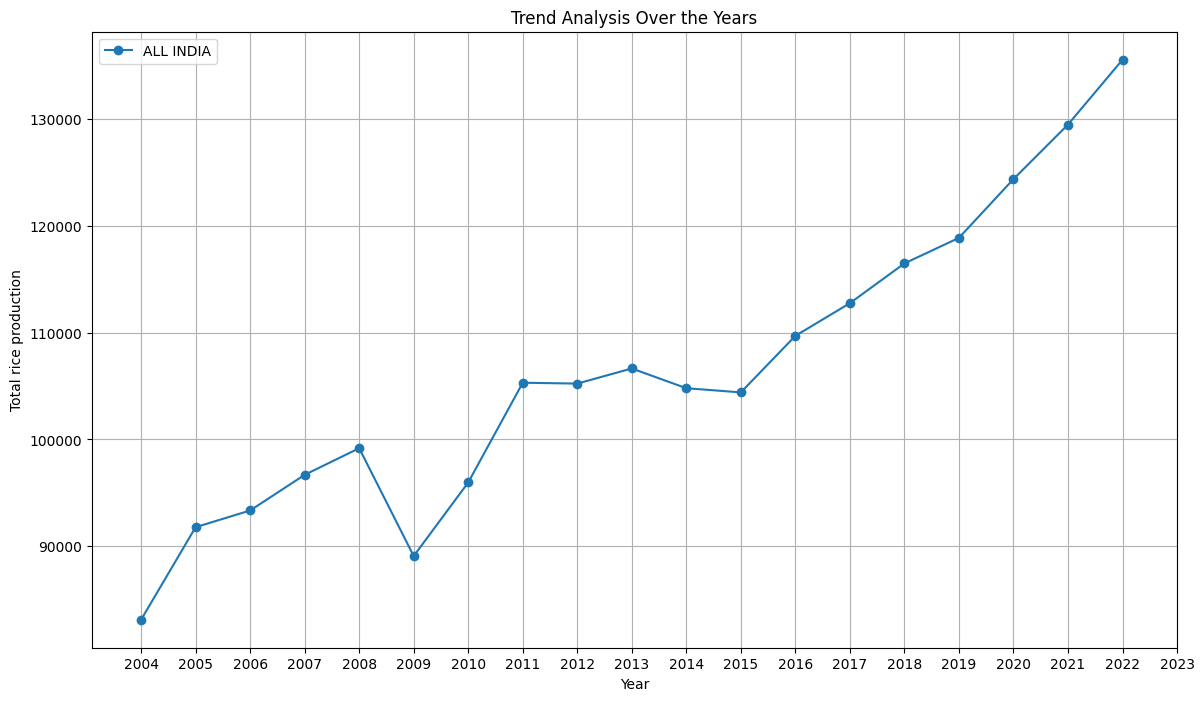

In [5]:
# Plotting trends over the years for ALL INDIA
plt.figure(figsize=(14, 8))

plt.plot(data['Year'], data['ALL INDIA'], marker='o', label='ALL INDIA')

plt.title('Trend Analysis Over the Years')
plt.xlabel('Year')
plt.ylabel('Total rice production')
plt.xticks(range(2004, 2024)) 
plt.legend()
plt.grid(True)

plt.show()

# State-wise Analysis: 


* Calculating the average production for each state (excluding the 'Year' and 'ALL INDIA' columns) and sort them

In [6]:

average_production_by_state = data.drop(columns=['Year', 'ALL INDIA']).mean().sort_values(ascending=False)

print(average_production_by_state)

West Bengal          15168.384211
Uttar Pradesh        13225.589474
Punjab               11517.252105
Andhra Pradesh        9061.278947
Odisha                7464.810526
Telangana             7211.446154
Chhattisgarh          6089.015789
Tamil Nadu            5980.278947
Bihar                 5842.026316
Assam                 4529.047368
Haryana               4013.820000
Karnataka             3730.921053
Madhya Pradesh        3146.136842
Maharashtra           2891.921053
Jharkhand             2729.881053
Gujarat               1702.621053
Tripura                713.444444
Uttarakhand            614.315789
Jammu & Kashmir        568.463333
Kerala                 563.694737
Manipur                431.544444
Rajasthan              343.156316
Nagaland               331.022222
Meghalaya              238.405556
Arunachal Pradesh      217.772222
Himachal Pradesh       126.962632
Goa                    115.172222
Mizoram                 56.488889
Puducherry              52.977778
NCT of Delhi  

* Plotting the average rice production by state as a bar chart


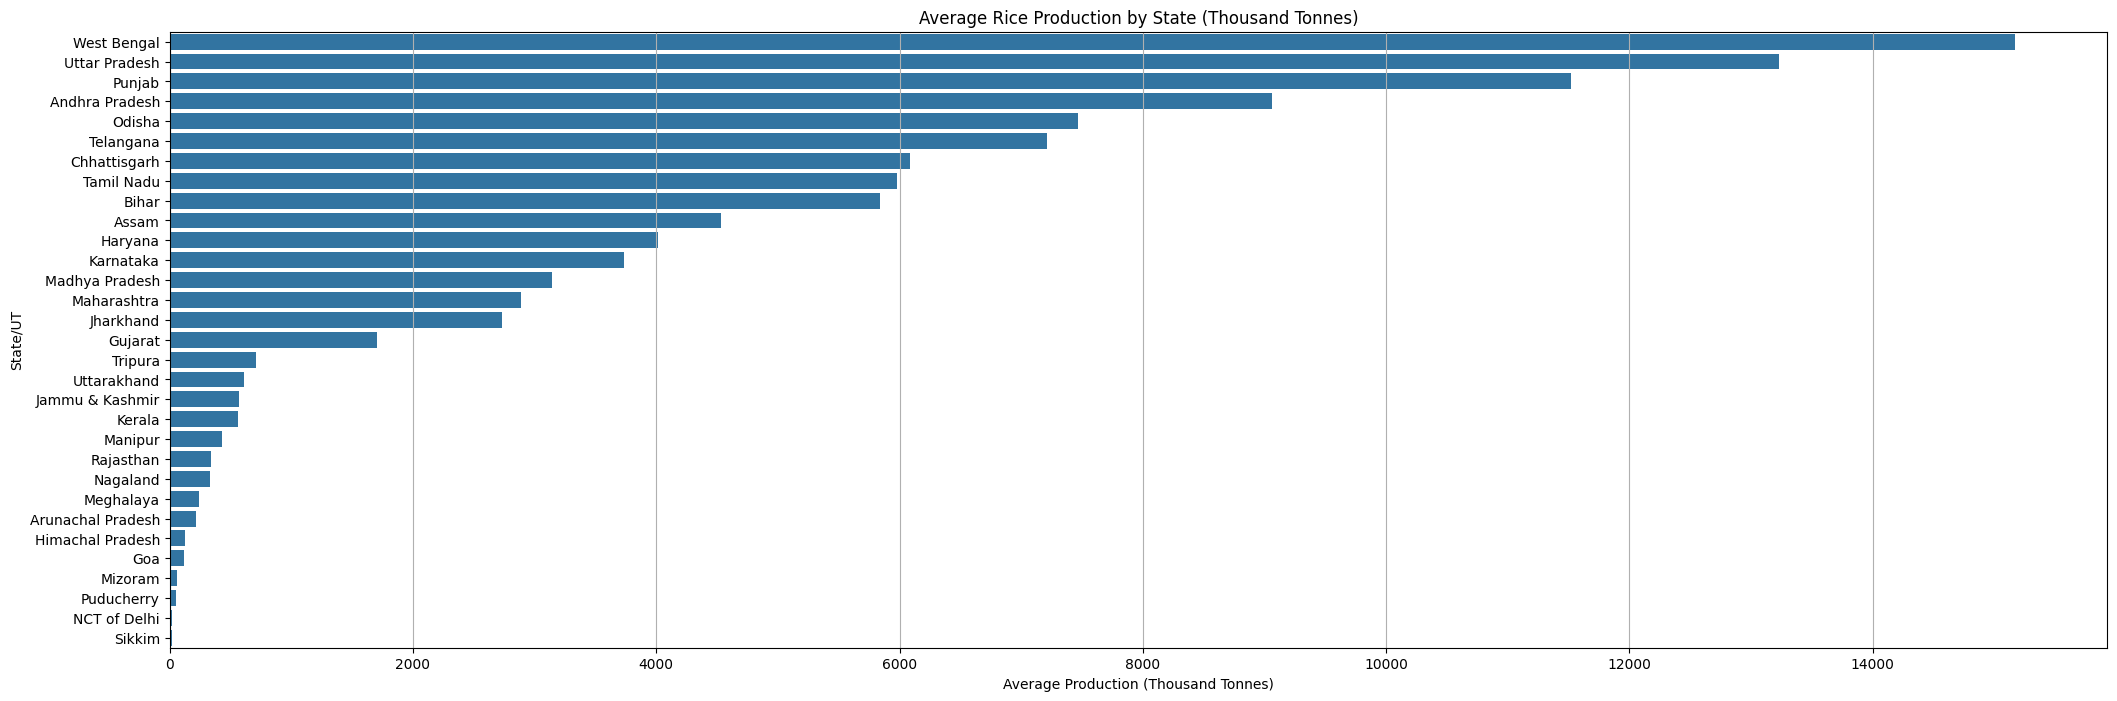

In [7]:
plt.figure(figsize=(25, 8))
sns.barplot(x=average_production_by_state.values, y=average_production_by_state.index)

plt.title('Average Rice Production by State (Thousand Tonnes)')
plt.xlabel('Average Production (Thousand Tonnes)')
plt.ylabel('State/UT')
plt.grid(axis='x')

plt.show()

        Visulizing a Pie Chart Based on the Average Production Share percentage of each States

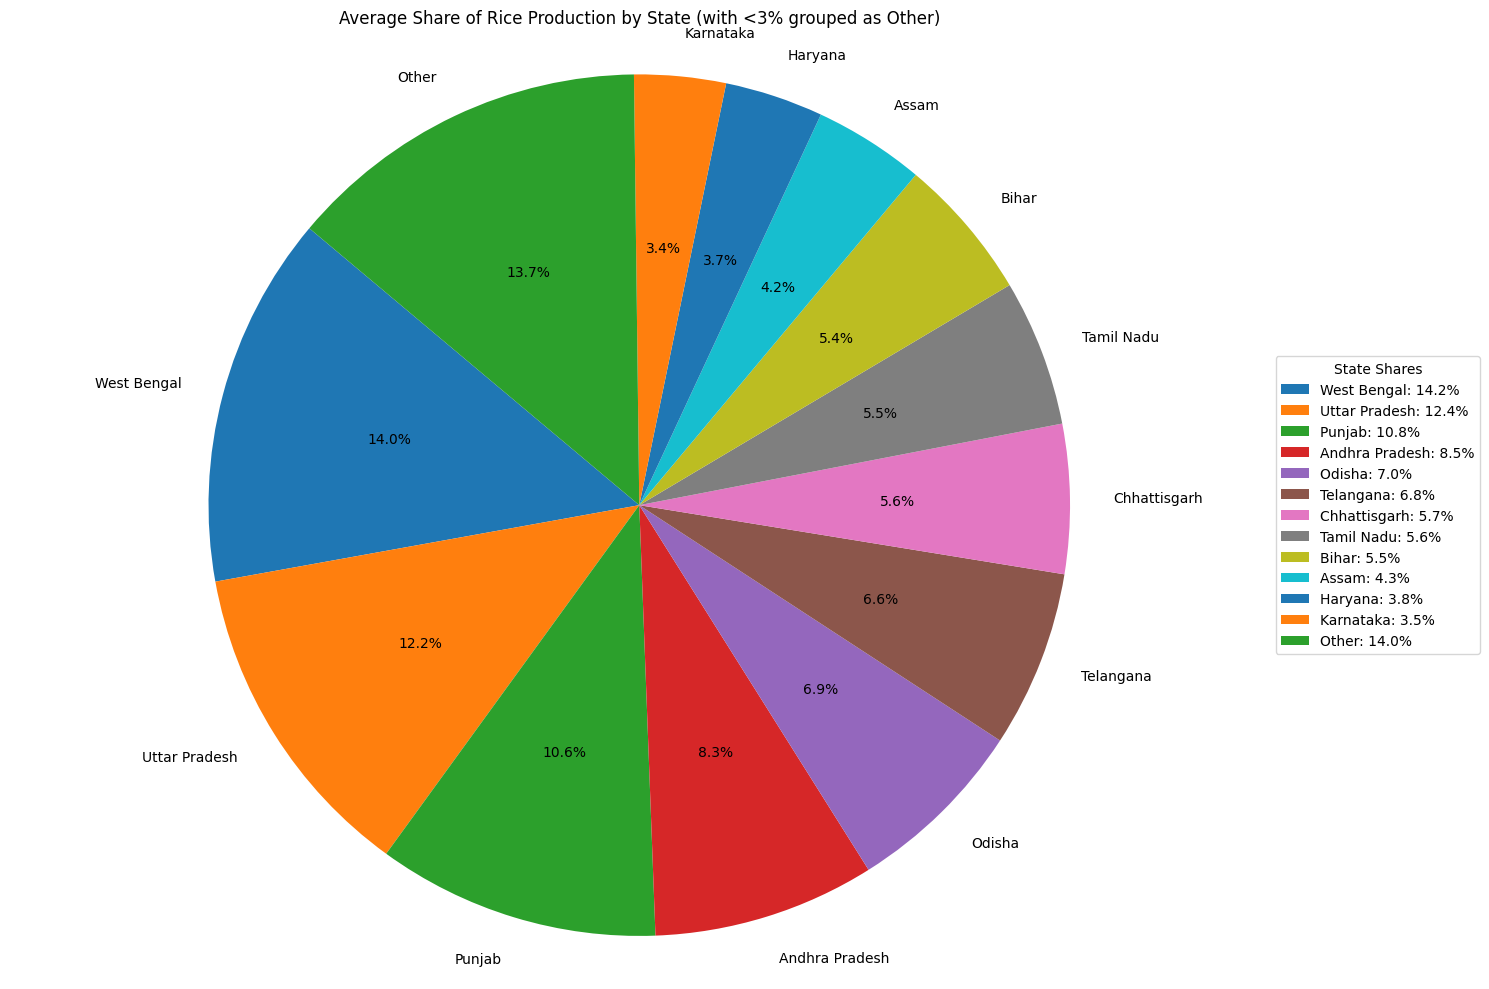

In [8]:
total_average_production = data['ALL INDIA'].mean()

shares = (average_production_by_state / total_average_production) * 100

# Group states with shares less than 3%
small_share_states = shares[shares < 3]
other_states_share = small_share_states.sum()
grouped_shares = shares[shares >= 3]
grouped_shares['Other'] = other_states_share  # Added the grouped "Other" category

# Plot the pie chart with the grouped shares
fig, ax = plt.subplots(figsize=(15, 10))
wedges, texts, autotexts = ax.pie(grouped_shares, labels=grouped_shares.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal') 
plt.title('Average Share of Rice Production by State (with <3% grouped as Other)')


legend_labels = [f'{label}: {share:.1f}%' for label, share in grouped_shares.items()]
legend_labels.append('Grouped States (<3% each):\n' + '\n'.join(small_share_states.index))
ax.legend(wedges, legend_labels, title="State Shares", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


        Visualize the rice production trends for top-producing states.

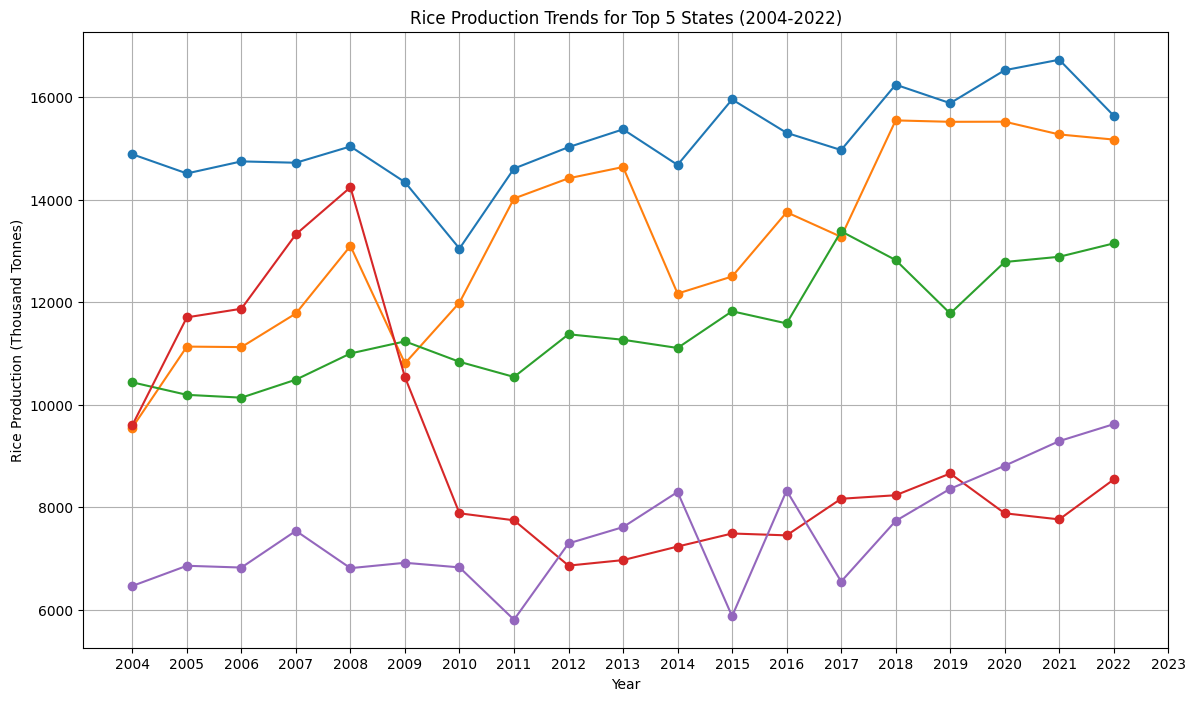

In [9]:

top_5_states = average_production_by_state.head(5).index.tolist()

top_5_states_data = data[['Year'] + top_5_states]

plt.figure(figsize=(14, 8))

for state in top_5_states:
    plt.plot(top_5_states_data['Year'], top_5_states_data[state], marker='o', label=state)

plt.title('Rice Production Trends for Top 5 States (2004-2022)')
plt.xlabel('Year')
plt.ylabel('Rice Production (Thousand Tonnes)')
plt.xticks(range(2004, 2024)) 
plt.grid(True)

plt.show()


# Visualize the rice production trends for all states.

        Visualize the rice production trends for all states together.

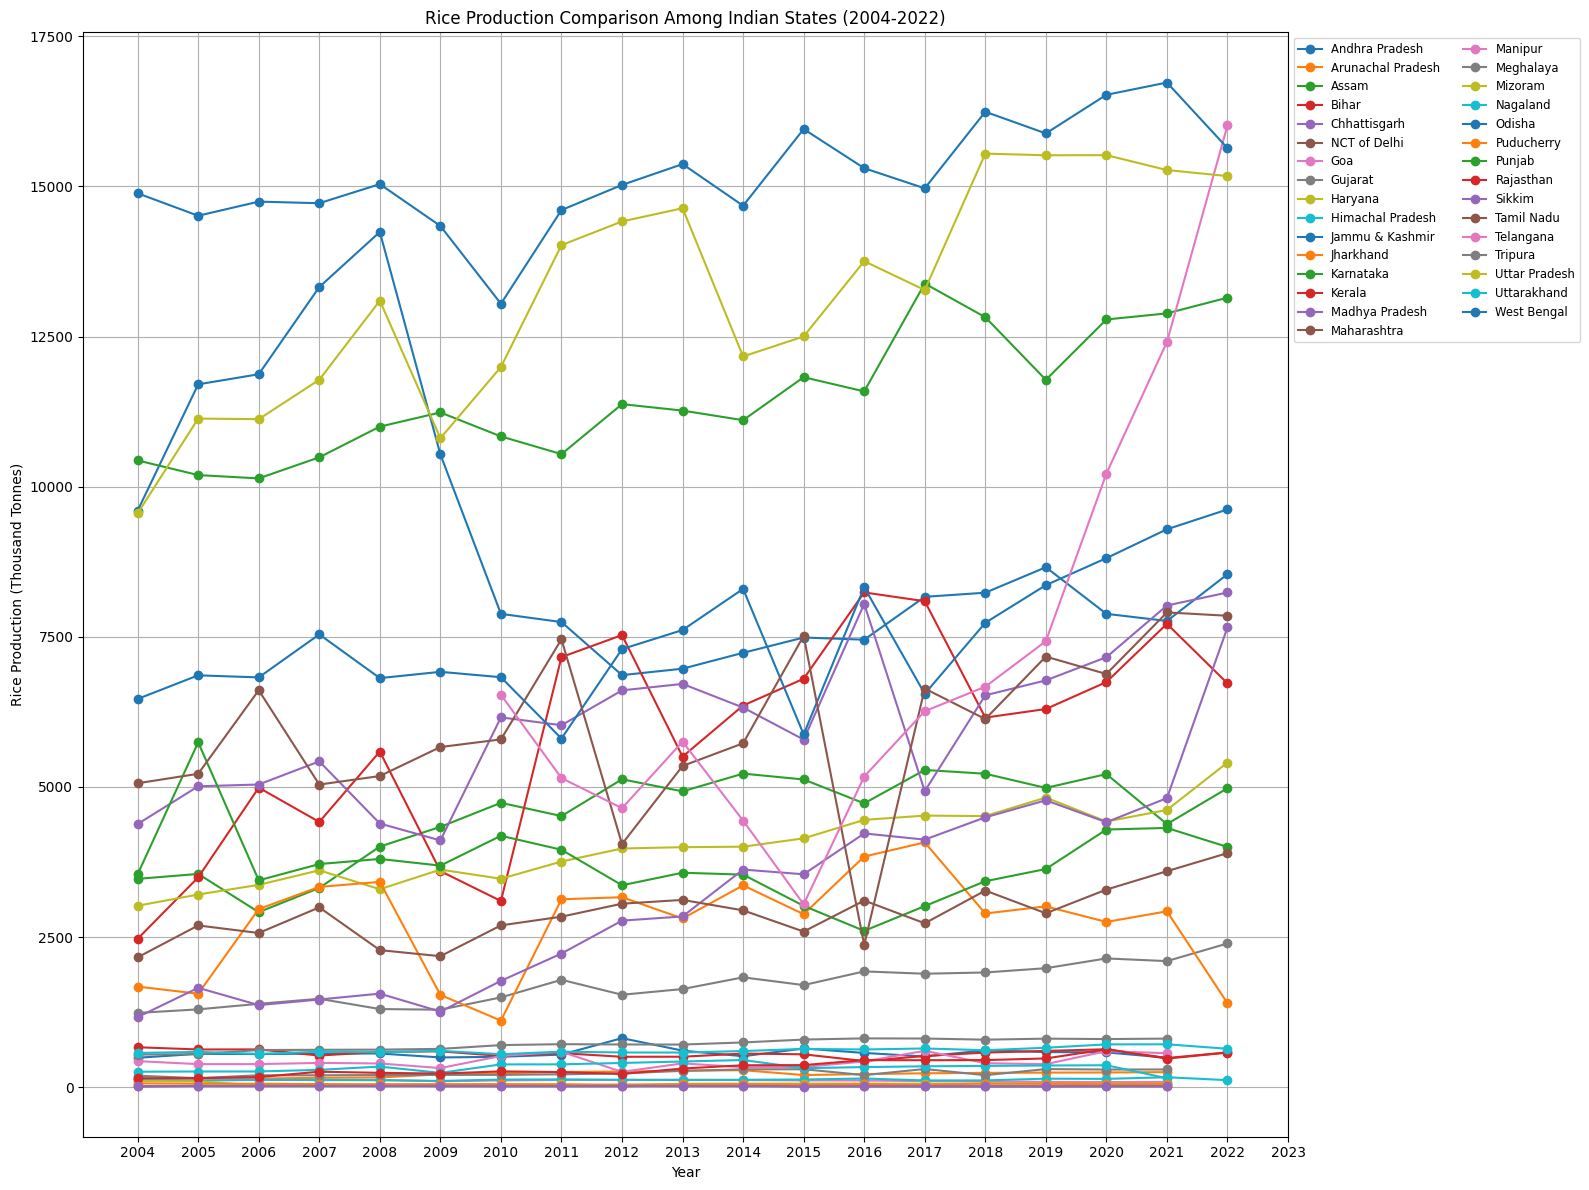

In [10]:

state_wise_production = data.drop(columns=['ALL INDIA']).set_index('Year')


plt.figure(figsize=(16, 12))


for state in state_wise_production.columns:
    plt.plot(state_wise_production.index, state_wise_production[state], label=state, marker='o')

plt.title('Rice Production Comparison Among Indian States (2004-2022)')
plt.xlabel('Year')
plt.ylabel('Rice Production (Thousand Tonnes)')
plt.xticks(range(2004, 2024))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)

plt.tight_layout()
plt.show()


        Visualize the rice production trends for all states.

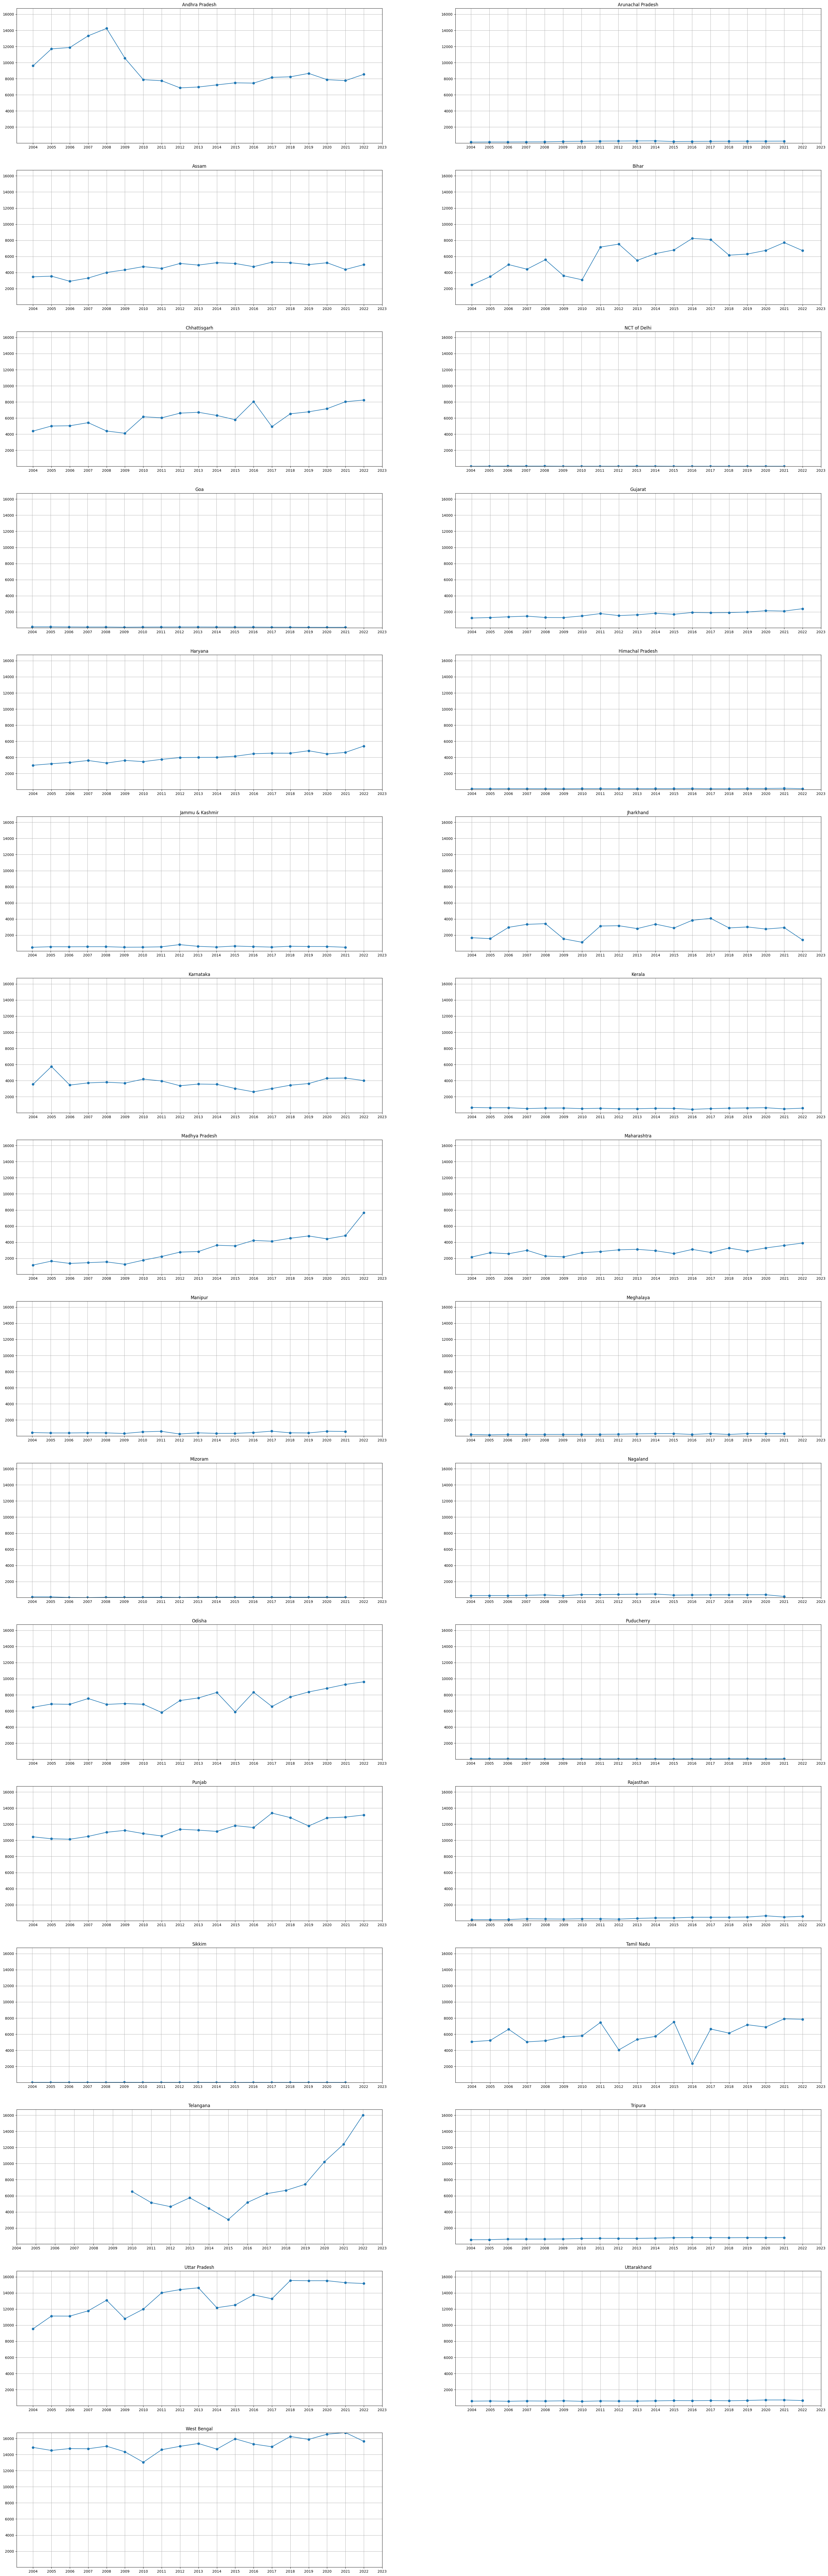

In [11]:
states_to_plot_all = [col for col in data.columns if col not in ['Year', 'ALL INDIA']]

num_states = len(states_to_plot_all)
num_cols = 2  
num_rows = (num_states + num_cols - 1) // num_cols  

for column in data.columns:
    if data[column].dtype == object:
        data[column] = pd.to_numeric(data[column], errors='coerce')


data.dtypes


y_min = data[states_to_plot_all].min().min()
y_max = data[states_to_plot_all].max().max()


# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(40, num_rows * 8))
axes = axes.flatten() 

for ax, state in zip(axes, states_to_plot_all):
    ax.plot(data['Year'], data[state], marker='o')
    ax.set_title(state)
    ax.grid(True)
    ax.set_xticks(range(2004, 2024)) 
    ax.set_ylim(y_min, y_max)  

for i in range(len(states_to_plot_all), len(axes)):
    axes[i].axis('off')

plt.show()


    Saving all the individual State Plots into a folder named 'State_Trends'

In [12]:
directory = 'State_Trends'

if not os.path.exists(directory):
    os.makedirs(directory)

for state in states_to_plot_all:
    plt.figure(figsize=(12, 8))
    plt.plot(data['Year'], data[state], marker='o', linestyle='-')
    plt.title(f'Rice Production Trends in {state}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Rice Production', fontsize=14)
    plt.xticks(range(2004, 2024))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(directory, f'{state}.png'))
    plt.close()

# Growth Rate Analysis

Analyzing year-on-year growth rates for rice production across the states can provide insights into patterns of increase or decrease in production, potentially reflecting impacts from policy changes, environmental conditions, or other factors. We'll calculate the year-on-year percentage change in rice production for each state, which is a common method to assess growth rates.

The formula to calculate the year-on-year growth rate between two consecutive years is:


$ Growth Rate = \frac{(Value_{Year\,n} - Value_{Year\,n-1})}{Value_{Year\,n-1}} \times 100 $




<br>


* Year on Year growth rates for all states and India(as a whole)

In [13]:
To_plot_all = [col for col in data.columns if col not in ['Year']]

growth_rates = data[To_plot_all].pct_change() * 100 

growth_rates['Year'] = data['Year']

cols = growth_rates.columns.tolist()
cols = cols[-1:] + cols[:-1]
growth_rates = growth_rates[cols]

growth_rates.head(6)

C:\Users\91878\AppData\Local\Temp\ipykernel_14412\2753039721.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = data[To_plot_all].pct_change() * 100


Year  Andhra Pradesh  Arunachal Pradesh      Assam      Bihar  \
0  2004             NaN                NaN        NaN        NaN   
1  2005       21.903968           8.296296   2.356873  41.392282   
2  2006        1.435407           0.000000 -17.916960  42.734945   
3  2007       12.230458           8.139535  13.820302 -11.448500   
4  2008        6.882318           3.668564  20.774330  26.531767   
5  2009      -26.002387          31.665650   8.167644 -35.615262   

   Chhattisgarh  NCT of Delhi        Goa    Gujarat   Haryana  ...    Punjab  \
0           NaN           NaN        NaN        NaN       NaN  ...       NaN   
1     14.333949     67.832168   1.446281   4.829591  6.185908  ... -2.337837   
2      0.594620     29.583333 -11.541073   7.087827  5.015576  ... -0.539586   
3      7.640735      0.964630  -6.676899   6.043165  7.178879  ...  3.462221   
4    -19.069030      0.000000   1.398026 -11.601085 -8.718516  ...  4.871770   
5     -6.407396    -38.535032 -18.410381  -0.844206  9.915100  ...  2.145455   

   Rajasthan     Sikkim  Tamil Nadu  Telangana    Tripura  Uttar Pradesh  \
0        NaN        NaN         NaN        NaN        NaN            NaN   
1   1.728723  -0.462963    3.117222        NaN   1.430930      16.514923   
2  10.980392   0.000000   26.639847        NaN  12.226442      -0.087123   
3  52.885748   6.511628  -23.755786        NaN   0.660757       5.897159   
4  -7.126348  -5.240175    2.827269        NaN   0.400256      11.179966   
5  -5.309000  11.981567    9.309819        NaN   2.057088     -17.484157   

   Uttarakhand  West Bengal  ALL INDIA  
0          NaN          NaN        NaN  
1     3.146853    -2.512630  10.419250  
2    -5.762712     1.620173   1.701538  
3     6.654676    -0.179033   3.575159  
4    -1.854975     2.159041   2.574750  
5     4.467354    -4.632481 -10.172762  

[6 rows x 33 columns]

In [14]:
growth_rates

Year  Andhra Pradesh  Arunachal Pradesh      Assam       Bihar  \
0   2004             NaN                NaN        NaN         NaN   
1   2005       21.903968           8.296296   2.356873   41.392282   
2   2006        1.435407           0.000000 -17.916960   42.734945   
3   2007       12.230458           8.139535  13.820302  -11.448500   
4   2008        6.882318           3.668564  20.774330   26.531767   
5   2009      -26.002387          31.665650   8.167644  -35.615262   
6   2010      -25.200228           8.433735   9.241449  -13.813797   
7   2011       -1.727900           8.974359  -4.651015  130.895200   
8   2012      -11.409465           3.137255  13.555344    5.119649   
9   2013        1.563593           5.019011  -3.927074  -26.875008   
10  2014        3.790694           3.186097   5.999472   15.454612   
11  2015        3.522305         -28.421053  -1.868765    7.008353   
12  2016       -0.484730           7.843137  -7.759849   21.126988   
13  2017        9.578122           6.045455  11.767568   -1.774423   
14  2018        0.838823           2.871839  -1.194239  -23.941382   
15  2019        5.151372           1.958333  -4.520553    2.315003   
16  2020       -8.961877           0.980793   4.618224    7.129247   
17  2021       -1.513402           2.144881 -15.968014   14.376760   
18  2022       10.030141           0.000000  13.639579  -12.852145   

    Chhattisgarh  NCT of Delhi        Goa    Gujarat    Haryana  ...  \
0            NaN           NaN        NaN        NaN        NaN  ...   
1      14.333949     67.832168   1.446281   4.829591   6.185908  ...   
2       0.594620     29.583333 -11.541073   7.087827   5.015576  ...   
3       7.640735      0.964630  -6.676899   6.043165   7.178879  ...   
4     -19.069030      0.000000   1.398026 -11.601085  -8.718516  ...   
5      -6.407396    -38.535032 -18.410381  -0.844206   9.915100  ...   
6      49.839432      1.554404  14.314115  15.835913  -4.220690  ...   
7      -2.120474      1.020408   5.913043  19.604437   8.266129  ...   
8       9.627762     -0.505051   0.821018 -13.910615   5.772812  ...   
9       1.628132     50.253807   3.013029   6.164828   0.553320  ...   
10     -5.870705    -12.500000  -4.743083  11.913203   0.200100  ...   
11     -8.425998    -33.204633  -4.481328  -7.040253   3.469795  ...   
12     39.019588      0.000000  -1.650738  13.396005   7.430639  ...   
13    -38.735649     -2.890173  -9.010601  -2.025907   1.580508  ...   
14     32.370001      0.000000  -4.077670   1.121159  -0.160942  ...   
15      3.798128      0.000000  -8.502024   3.713195   6.824472  ...   
16      5.703489     17.857143  -3.429204   8.199284  -8.278921  ...   
17     12.016143     -4.040404   3.550974  -2.078576   4.363940  ...   
18      2.700176      0.000000   0.000000  13.997430  17.083153  ...   

       Punjab  Rajasthan     Sikkim  Tamil Nadu  Telangana    Tripura  \
0         NaN        NaN        NaN         NaN        NaN        NaN   
1   -2.337837   1.728723  -0.462963    3.117222        NaN   1.430930   
2   -0.539586  10.980392   0.000000   26.639847        NaN  12.226442   
3    3.462221  52.885748   6.511628  -23.755786        NaN   0.660757   
4    4.871770  -7.126348  -5.240175    2.827269        NaN   0.400256   
5    2.145455  -5.309000  11.981567    9.309819        NaN   2.057088   
6   -3.551086  16.294350 -13.580247    2.245287        NaN   9.765625   
7   -2.722156  -4.557439  -0.476190   28.767005 -21.219169   2.249110   
8    7.892241 -12.194159   1.913876  -45.702334  -9.734307  -0.710010   
9   -0.940742  40.494382  -4.694836   32.097089  23.827352  -0.196298   
10  -1.420076  17.306462  -0.985222    7.065685 -22.835795   4.945209   
11   6.446385   0.845378 -34.825871   31.238870 -31.386237   6.398929   
12  -2.002876  22.417523  50.381679  -68.479866  69.786675   2.491193   
13  15.497661  -0.404241 -10.507614  180.193298  21.046121  -0.306899   
14  -4.186211   0.516779  -2.439024   -7.651870   6.512088  -2.3273

# Average Growth Rate of Production In Different States

In [15]:
average_growth_rate = growth_rates.drop(columns=['Year', 'ALL INDIA']).mean().sort_values(ascending=False)

average_growth_rate

Madhya Pradesh       12.767668
Tamil Nadu           11.390480
Telangana            11.284482
Bihar                10.431349
Rajasthan             9.332265
Jharkhand             8.491434
Mizoram               7.896103
Manipur               6.263628
Chhattisgarh          5.480161
Meghalaya             4.734652
NCT of Delhi          4.299478
Maharashtra           4.261420
Gujarat               4.133633
Arunachal Pradesh     4.107994
Haryana               3.470070
Odisha                3.468374
Uttar Pradesh         3.074848
Assam                 2.563018
Karnataka             2.545396
Tripura               2.296423
Punjab                1.435341
Jammu & Kashmir       1.323061
Himachal Pradesh      0.813491
Uttarakhand           0.799800
West Bengal           0.417925
Puducherry            0.386216
Nagaland              0.135949
Andhra Pradesh        0.090401
Kerala                0.034265
Sikkim               -0.524011
Goa                  -2.337029
dtype: float64

<br>

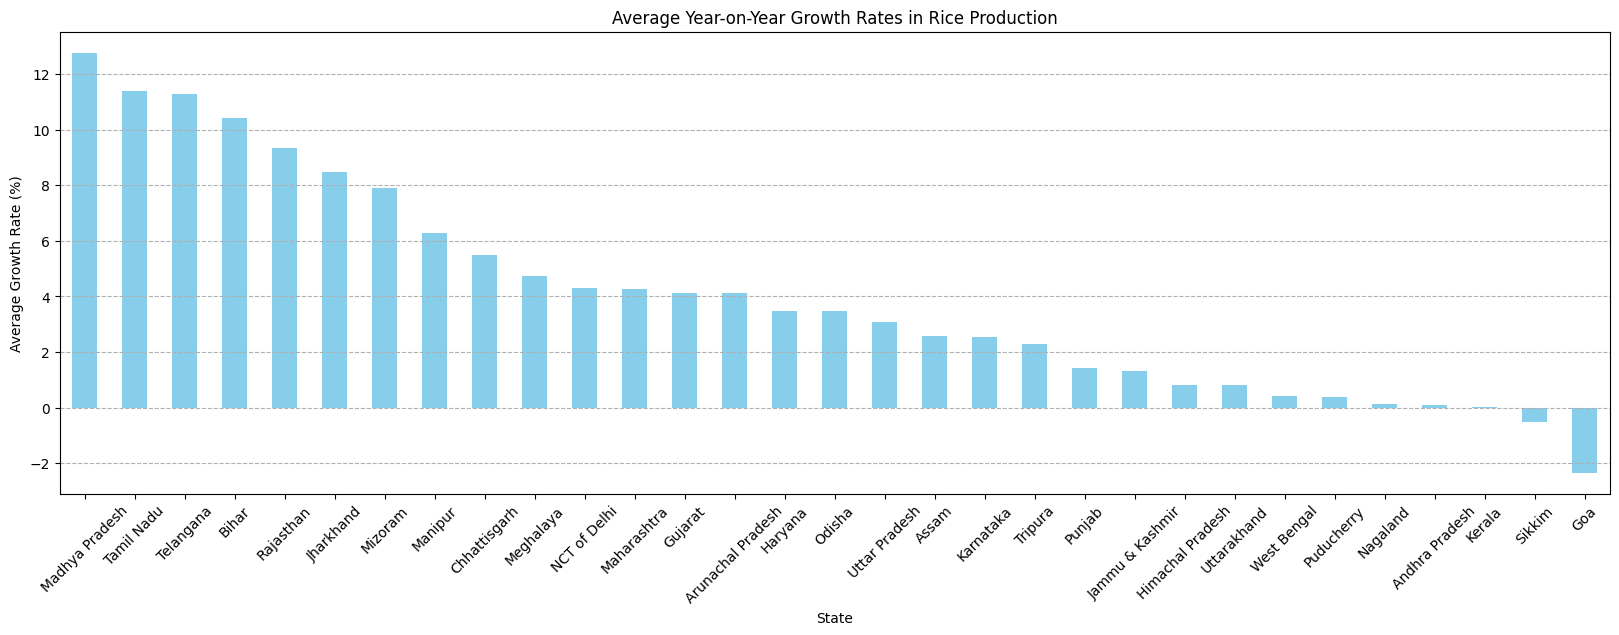

In [16]:
plt.figure(figsize=(20, 6))
average_growth_rate.plot(kind='bar', color='skyblue')
plt.title('Average Year-on-Year Growth Rates in Rice Production')
plt.xlabel('State')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

* Top 5 States on terms of Average Growth Rate

In [17]:
top_5_states_gr = average_growth_rate.head(5).index.tolist()

top_5_states_gr_data = growth_rates[['Year'] + top_5_states_gr]

top_5_states_gr_data

Year  Madhya Pradesh  Tamil Nadu  Telangana       Bihar  Rajasthan
0   2004             NaN         NaN        NaN         NaN        NaN
1   2005       41.685201    3.117222        NaN   41.392282   1.728723
2   2006      -17.382117   26.639847        NaN   42.734945  10.980392
3   2007        6.832797  -23.755786        NaN  -11.448500  52.885748
4   2008        6.689924    2.827269        NaN   26.531767  -7.126348
5   2009      -19.176765    9.309819        NaN  -35.615262  -5.309000
6   2010       40.575916    2.245287        NaN  -13.813797  16.294350
7   2011       25.687038   28.767005 -21.219169  130.895200  -4.557439
8   2012       24.590311  -45.702334  -9.734307    5.119649 -12.194159
9   2013        2.515315   32.097089  23.827352  -26.875008  40.494382
10  2014       27.436024    7.065685 -22.835795   15.454612  17.306462
11  2015       -2.168096   31.238870 -31.386237    7.008353   0.845378
12  2016       19.175572  -68.479866  69.786675   21.126988  22.417523
13  2017       -2.434466  180.193298  21.046121   -1.774423  -0.404241
14  2018        8.991489   -7.651870   6.512088  -23.941382   0.516779
15  2019        6.307429   16.966514  11.361319    2.315003   6.023831
16  2020       -7.626303   -4.042615  37.552169    7.129247  31.945890
17  2021        9.087408   14.901471  21.459122   14.376760 -24.511041
18  2022       59.031340   -0.708269  29.044449  -12.852145  20.643544

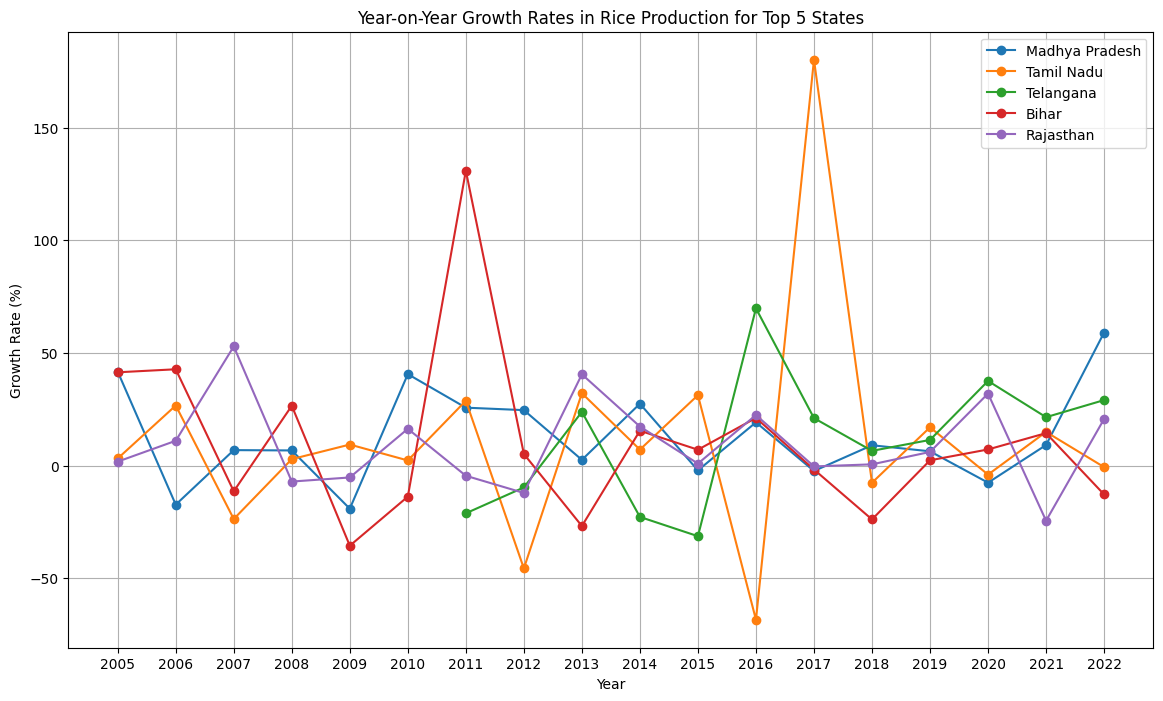

In [18]:
sample_states = top_5_states_gr

growth_rates_sample = growth_rates[sample_states]

plt.figure(figsize=(14, 8))

for state in sample_states:
    plt.plot(data['Year'][1:], growth_rates_sample[state][1:], marker='o', label=state)

plt.title('Year-on-Year Growth Rates in Rice Production for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(data['Year'][1:])  # Excluding the first year for which the growth rate cannot be calculated
plt.legend()
plt.grid(True)

plt.show()


# VOLATILITY ANALYSIS

Volatility analysis in the context of year-on-year growth rates can provide insights into the stability of rice production across different states. A state with high volatility in its growth rates might experience significant fluctuations in rice production due to various factors, including weather conditions, pests, diseases, and changes in economic policies or market conditions. Conversely, states with low volatility indicate more stable production levels over the years.

To perform this analysis, we can calculate the standard deviation of the year-on-year growth rates for each state. The standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

# Volatality Calculation

Given:
- $ S $ is the set of data representing the states.
- $ \text{std}(S) $ is the function that calculates the standard deviation of the data set $ S $.
- $ \text{sort}(X, \text{order}) $ is the function that sorts the elements of set $ X $ according to the specified order.

The process described can be formalized as follows:

1. Calculate the standard deviation for each state:
   $ \text{std}(S) = \{ \text{std}(s_1), \text{std}(s_2), \ldots, \text{std}(s_n) \} $

2. Sort the standard deviations in descending order:
   $ \text{sort}(\text{std}(S), \text{descending}) = \{ \text{std}(s_{i_1}), \text{std}(s_{i_2}), \ldots, \text{std}(s_{i_n}) \} $

3. Assign the sorted standard deviations to the variable $ \text{volatility} $:
   $ \text{volatility} = \text{sort}(\text{std}(S), \text{descending}) $

Thus, formally:
$ \text{volatility} = \text{sort}(\text{std}(S), \text{descending}) $


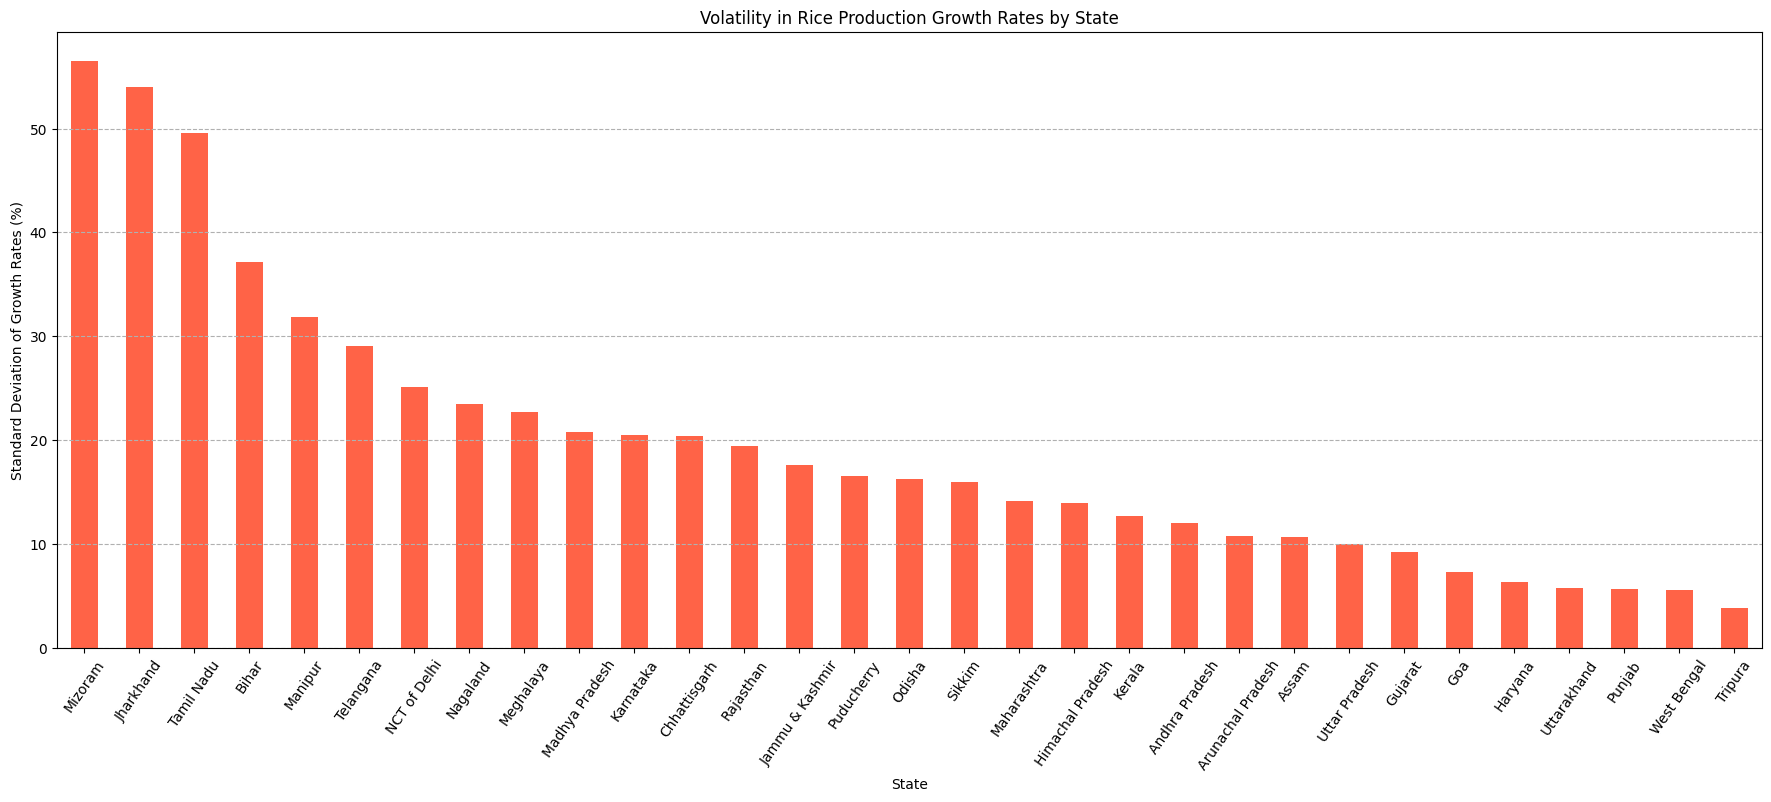

In [19]:
states_only = growth_rates.drop(columns=['Year','ALL INDIA'])

# The standard deviation for each state to measure volatility and sort them in an ascending order
volatility = states_only.std().sort_values(ascending=False)

# Plotting the volatility in a bar chart
plt.figure(figsize=(22, 8))
volatility.plot(kind='bar', color='tomato')
plt.title('Volatility in Rice Production Growth Rates by State')
plt.xlabel('State')
plt.ylabel('Standard Deviation of Growth Rates (%)')
plt.xticks(rotation=55)
plt.grid(axis='y', linestyle='--')

plt.show()


## Volatility in Rice Production Growth Rates by State

This bar chart represents the volatility in rice production growth rates by state, as measured by the standard deviation of growth rates. The states are listed on the horizontal axis, and the standard deviation of the growth rates, expressed as a percentage, is on the vertical axis.

### Observations:

- **High Volatility**: States such as Mizoram, Jharkhand, Tamil Nadu, and Bihar exhibit the highest volatility in rice production growth rates. High volatility implies that the year-on-year growth rates of rice production in these states vary greatly. This could be due to a variety of factors including environmental variability, economic factors, or policy changes impacting agriculture.

- **Moderate to Low Volatility**: States like Maharashtra, Himachal Pradesh, Kerala, Andhra Pradesh, and Assam show moderate volatility. States at the right end of the chart, such as Haryana, Uttarakhand, Punjab, West Bengal, and Tripura, show the least volatility in growth rates. Lower volatility suggests more stable rice production growth year over year in these states.


# Outliers and Anomalies:

# <h2>Calculating Outliers<h2>

Given:
- $ Q1 $ represents the first quartile.
- $ Q3 $ represents the third quartile.
- $ IQR $ represents the interquartile range.
- $ \text{lower\_bound} $ represents the lower bound for identifying outliers.
- $ \text{upper\_bound} $ represents the upper bound for identifying outliers.
- $ \text{outliers} $ represents the set of values identified as outliers.

Mathematically:

1. Calculate quartiles and interquartile range:
   - $ Q1 = \text{25th percentile of data} $
   - $ Q3 = \text{75th percentile of data} $
   - $ IQR = Q3 - Q1 $

2. Define the lower and upper bounds for identifying outliers:
   - $ \text{lower\_bound} = Q1 - 1.5 \times IQR $
   - $ \text{upper\_bound} = Q3 + 1.5 \times IQR $

3. Identify outliers:
   - $ \text{outliers} = \{ x : x < \text{lower\_bound} \text{ or } x > \text{upper\_bound} \} $

Thus, mathematically:

$ Q1 = \text{25th percentile of data} $  
$ Q3 = \text{75th percentile of data} $  
$ IQR = Q3 - Q1 $  
$ \text{lower\_bound} = Q1 - 1.5 \times IQR $  
$ \text{upper\_bound} = Q3 + 1.5 \times IQR $  
$ \text{outliers} = \{ x : x < \text{lower\_bound} \text{ or } x > \text{upper\_bound} \} $


## Identifying Outliers:



In [20]:
# Function to calculate outliers using the IQR method
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return series[(series < lower_bound) | (series > upper_bound)]

outliers = data.drop(columns=['Year', 'ALL INDIA']).apply(calculate_outliers)

outliers_filtered = outliers.dropna(how='all', axis=1)

outliers_filtered


Andhra Pradesh  Himachal Pradesh  Jammu & Kashmir  Karnataka  Maharashtra  \
0              NaN               NaN              NaN        NaN          NaN   
1              NaN               NaN              NaN     5744.0          NaN   
3              NaN               NaN              NaN        NaN          NaN   
4          14241.0               NaN              NaN        NaN          NaN   
6              NaN               NaN              NaN        NaN          NaN   
8              NaN               NaN            818.1        NaN          NaN   
12             NaN               NaN              NaN     2604.8          NaN   
17             NaN             167.5              NaN        NaN          NaN   
18             NaN               NaN              NaN        NaN       3899.1   

    Mizoram  Tamil Nadu  Telangana  West Bengal  
0     104.1         NaN        NaN          NaN  
1      99.2         NaN        NaN          NaN  
3      15.7         NaN        NaN          NaN  
4       NaN         NaN        NaN          NaN  
6       NaN         NaN        NaN      13045.9  
8       NaN         NaN        NaN          NaN  
12      NaN      2369.4        NaN          NaN  
17      NaN         NaN    12409.6          NaN  
18      NaN         NaN    16013.9          NaN

### The analysis of outliers in rice production across different states reveals specific instances where production was significantly different from the typical range. Here are the key findings based on the calculated outliers:

#### States with Outliers in Rice Production:
* Andhra Pradesh: One year (2008) had notably high rice production.
* Himachal Pradesh and Jammu & Kashmir: Each had a year with unusually high production.
* Karnataka: Displayed outliers in both directions, indicating years with unusually high and low rice production.
* Maharashtra: One year (2018) showed significantly high production.
* Mizoram: Exhibited low production outliers in three different years, suggesting variability or challenges in those years.
* Tamil Nadu and Telangana: Each had years with significantly high rice production, which might indicate successful agricultural years or increased area under rice cultivation.
* West Bengal: One year (2012) had notably low rice production compared to its usual performance.
Analysis Implications:

*#* The presence of outliers can indicate years where external factors significantly impacted rice production. These factors could include climatic conditions such as droughts or floods, pest attacks, policy changes, or advancements in agricultural techniques.

*#* The outlier analysis provides valuable insights for further investigation into the specific causes behind these anomalies. For agricultural policy makers, understanding the reasons behind these outliers can inform strategies to stabilize production, such as investing in irrigation infrastructure, pest management, or support for farmers during adverse conditions.
This analysis offers a snapshot of the variability and challenges in rice production across India, highlighting the importance of targeted interventions to ensure food security and support for the agricultural sector.

In [21]:
top_5_states_stats = state_wise_production[top_5_states].describe()

# Finding the IQR (Interquartile Range) for identifying outliers
# Outliers are defined as values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
Q1 = top_5_states_stats.loc['25%']
Q3 = top_5_states_stats.loc['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers: filter the data to include only values outside the upper and lower bounds
outliers = pd.DataFrame(columns=top_5_states, index=data['Year'])

for state in top_5_states:
    state_outliers = data[
        (data[state] < lower_bound[state]) | 
        (data[state] > upper_bound[state])
    ][['Year', state]].set_index('Year')
    outliers[state] = state_outliers[state]


outliers = outliers.dropna(how='all')

# Display the descriptive statistics
top_5_states_stats


West Bengal  Uttar Pradesh        Punjab  Andhra Pradesh       Odisha
count     19.000000      19.000000     19.000000       19.000000    19.000000
mean   15168.384211   13225.589474  11517.252105     9061.278947  7464.810526
std      867.613563    1849.559244   1037.304623     2212.017631  1084.630876
min    13045.900000    9555.600000  10138.000000     6862.400000  5807.000000
25%    14698.350000   11886.000000  10689.500000     7617.450000  6818.700000
50%    15023.700000   13274.000000  11267.000000     8166.200000  7295.500000
75%    15759.150000   14903.650000  12303.350000    10069.500000  8312.050000
max    16728.700000   15545.300000  13381.790000    14241.000000  9621.200000

In [22]:
# Display the outliers
outliers

West Bengal  Uttar Pradesh  Punjab  Andhra Pradesh  Odisha
Year                                                            
2008          NaN            NaN     NaN         14241.0     NaN
2010      13045.9            NaN     NaN             NaN     NaN

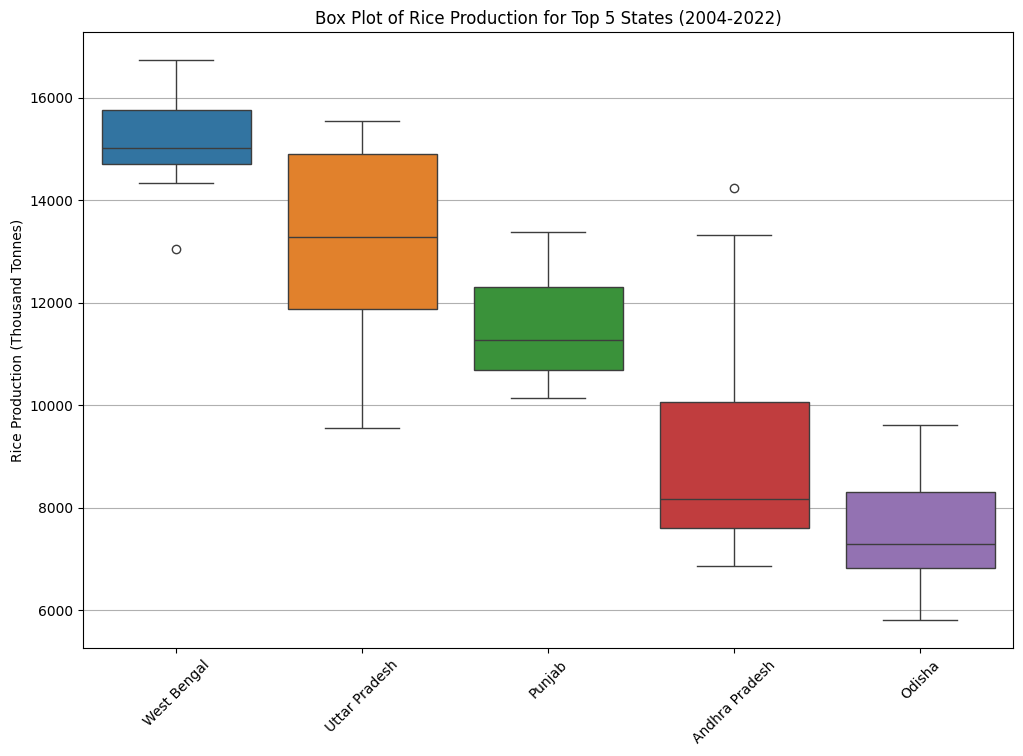

In [23]:
# Creating box plots for the top 5 rice-producing states
top_5_states_data_for_boxplot = state_wise_production[top_5_states]

plt.figure(figsize=(12, 8))
sns.boxplot(data=top_5_states_data_for_boxplot)
plt.title('Box Plot of Rice Production for Top 5 States (2004-2022)')
plt.ylabel('Rice Production (Thousand Tonnes)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


# Insights From Box Plot

Based on the box plot, which compares rice production for the top 5 states in India from 2004 to 2022, here are some insights:

* Variability: Uttar Pradesh and West Bengal show a higher variability in rice production compared to other states, as indicated by the length of their boxes and whiskers.

* Outliers: West Bengal has an outlier on the lower side, suggesting there was at least one year where rice production was significantly lower than typical for the state.

* Median Production: The median line (the line in the middle of the box) for Punjab indicates lower median rice production compared to West Bengal and Uttar Pradesh, but it's higher than Andhra Pradesh and Odisha.

* Interquartile Range (IQR): Uttar Pradesh has the largest IQR, indicating a larger spread of the middle 50% of the data points. Punjab and Odisha have a relatively smaller IQR, suggesting more consistent production year to year within the middle 50%.

* Consistency: Andhra Pradesh and Odisha appear to have the most consistent production with the narrowest boxes.

* Potential High Production Years: The 'whiskers' extend to the maximum and minimum values that are not considered outliers. For Uttar Pradesh, there seems to be at least one year with exceptionally high production, as indicated by the upper whisker.

* Overall Production Health:
A lack of outliers for most of the top states (except West Bengal) suggests a generally stable rice production environment over the years, with occasional deviations. A single outlier in West Bengal is not indicative of a trend but does warrant investigation.

* Comparison and Trends:
When comparing these states, West Bengal and Uttar Pradesh stand out for their higher median production and variability. This can be advantageous as it may reflect a robust rice sector that can potentially yield high outputs, but it also suggests a susceptibility to fluctuating conditions.

# State Wise Insights From Box Plot

* West Bengal:
The box plot for West Bengal shows one outlier below the lower whisker. This indicates a year where rice production was significantly below the norm. Investigating the specific year and production level, one might correlate this drop with historical events, such as a natural disaster (e.g., flood or drought) or other disruptions.

* Uttar Pradesh:
Uttar Pradesh shows a wide range of production with a large interquartile range. This suggests that while production is generally high, it is also more variable, which might reflect a diverse agricultural environment with varying levels of vulnerability to climatic or economic factors.

* Punjab:
Punjab's box plot indicates less variability and no outliers. This state has traditionally been a leader in agricultural productivity in India, often attributed to the Green Revolution. The consistency in the box plot reinforces Punjab's reputation for stable agricultural outputs.

* Andhra Pradesh:
Andhra Pradesh has a smaller box, indicating less variation in rice production. However, note that data before 2010 has been set to NaN, which means the box plot only reflects a narrower time window for this state compared to others.

* Odisha:
Odisha's box plot indicates a range of production values, with the upper whisker stretching higher than those of Andhra Pradesh and Punjab. This could point to years of particularly strong output, perhaps influenced by successful agricultural policies, favorable weather conditions, or improvements in rice cultivation technology.

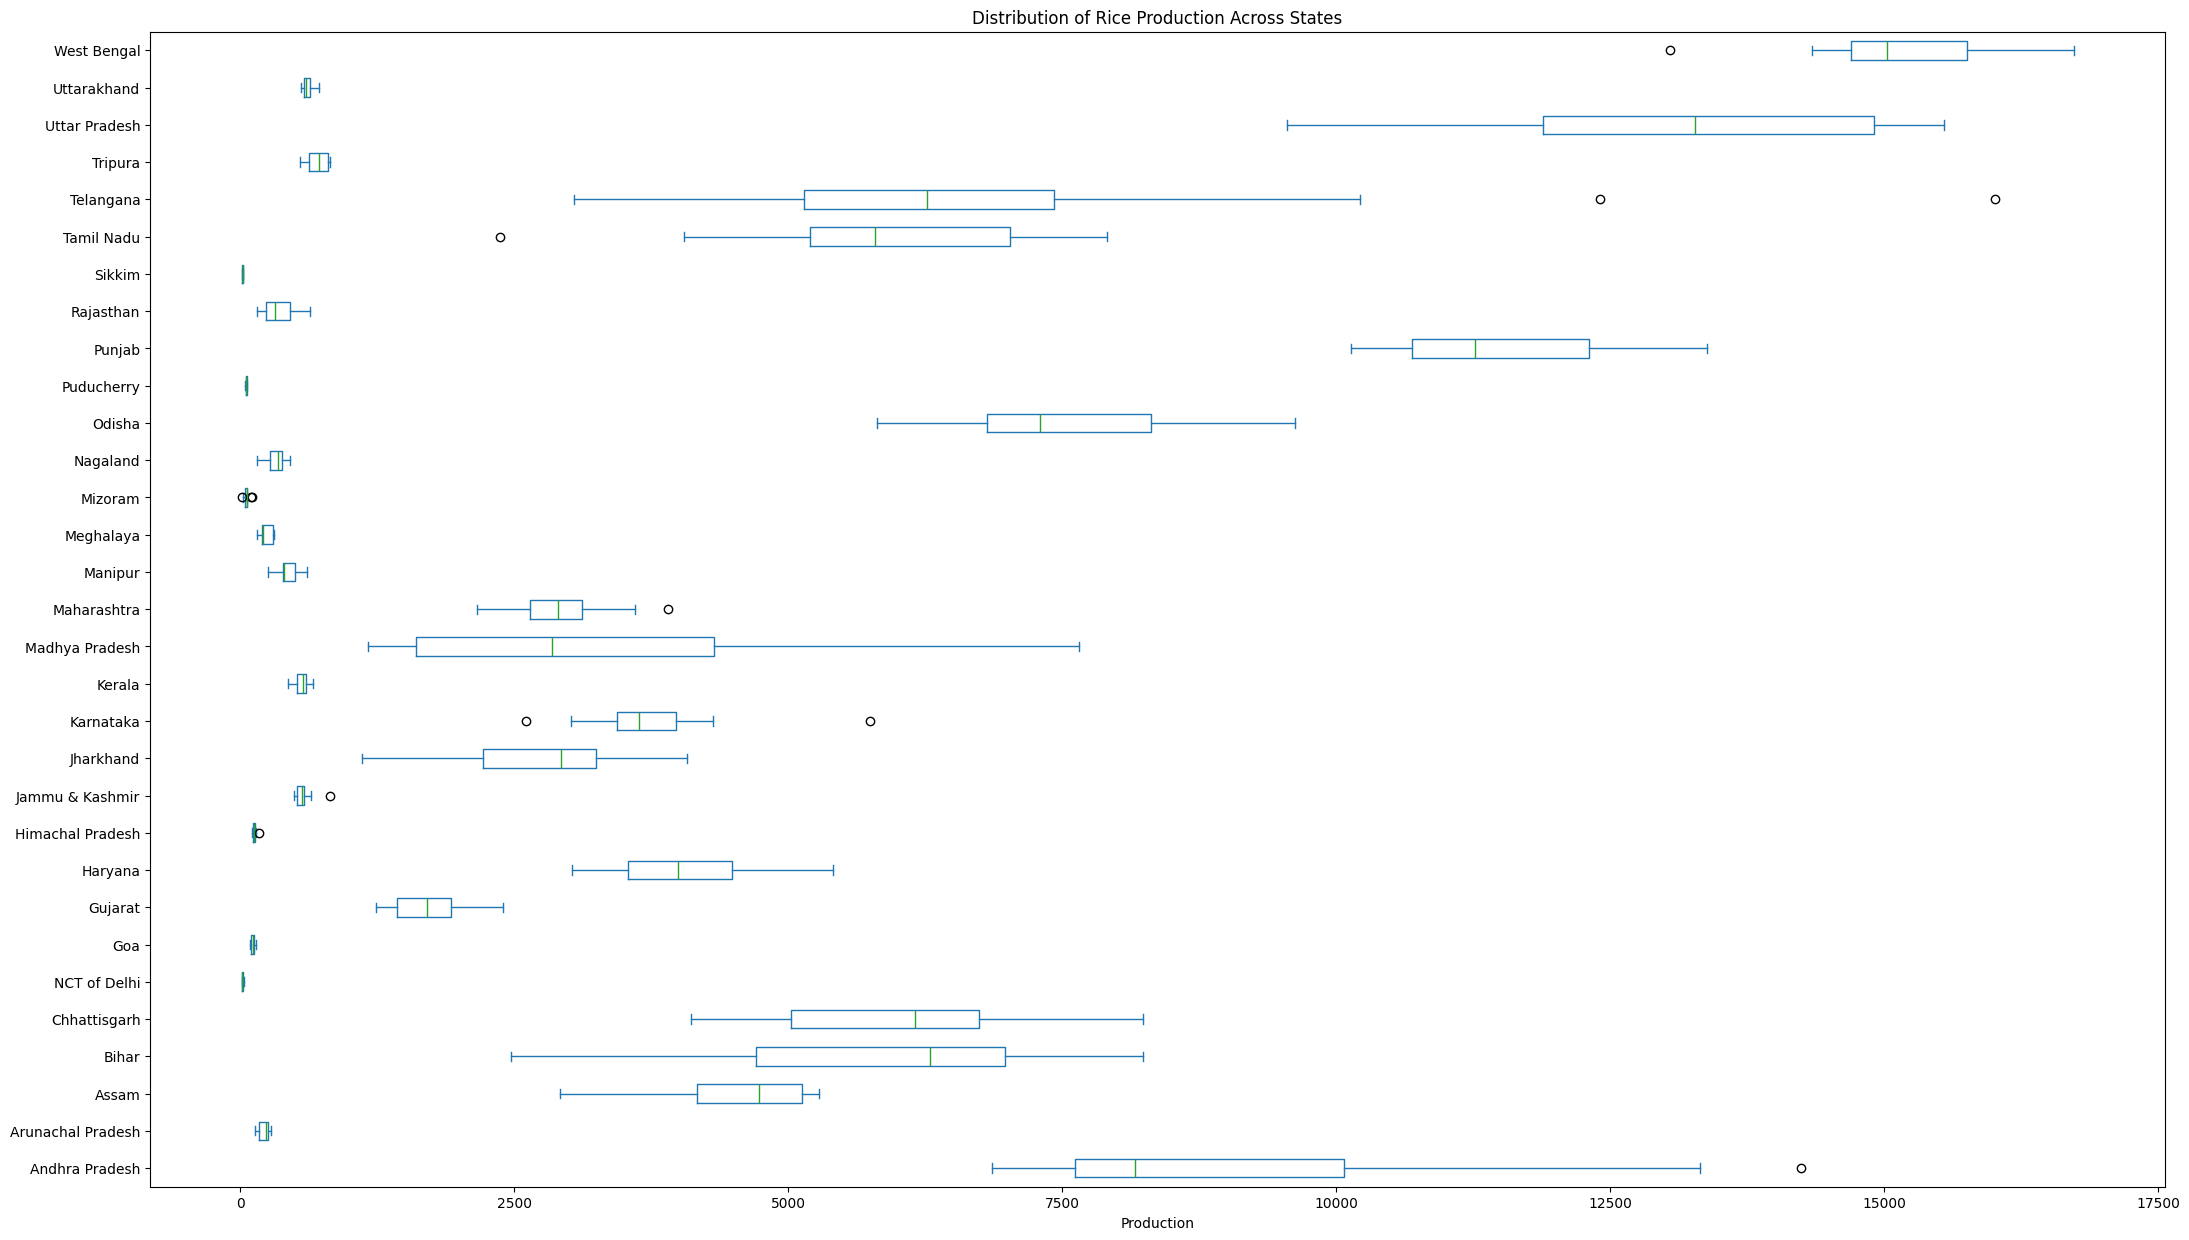

In [24]:
data_boxplot = data.drop(columns=['Year', 'ALL INDIA'])
data_boxplot.plot(kind='box', vert=False, figsize=(26, 15))
plt.title('Distribution of Rice Production Across States')
plt.xlabel('Production')
plt.show()

The boxplot visualizes the distribution of rice production across different states in India, offering insights into the median production levels, the spread (interquartile range), and the presence of outliers within each state's production data. Here's an analysis based on the plot:


# Key Observations:
* #### Variability:
 There's a significant variability in rice production across states. Some states have a much higher median production compared to others, indicating regional differences in rice cultivation efficiency, climate suitability, and available agricultural land.
* #### Outliers:
 Outliers are represented by dots outside the "whiskers" of each boxplot. These indicate years where a state's rice production was significantly higher or lower than typical. The presence of outliers could be due to various factors, such as favorable/unfavorable weather conditions, pest outbreaks, changes in agricultural policy, or shifts in the area under cultivation.
* #### Distribution Spread:
 The spread of the boxplots (i.e., the interquartile range) varies widely among the states. A wider box indicates more variability in production over the years, while a narrower box suggests more consistent production. States with wider boxes may experience more fluctuation in environmental conditions or agricultural practices over time.

# Correlation Analysis

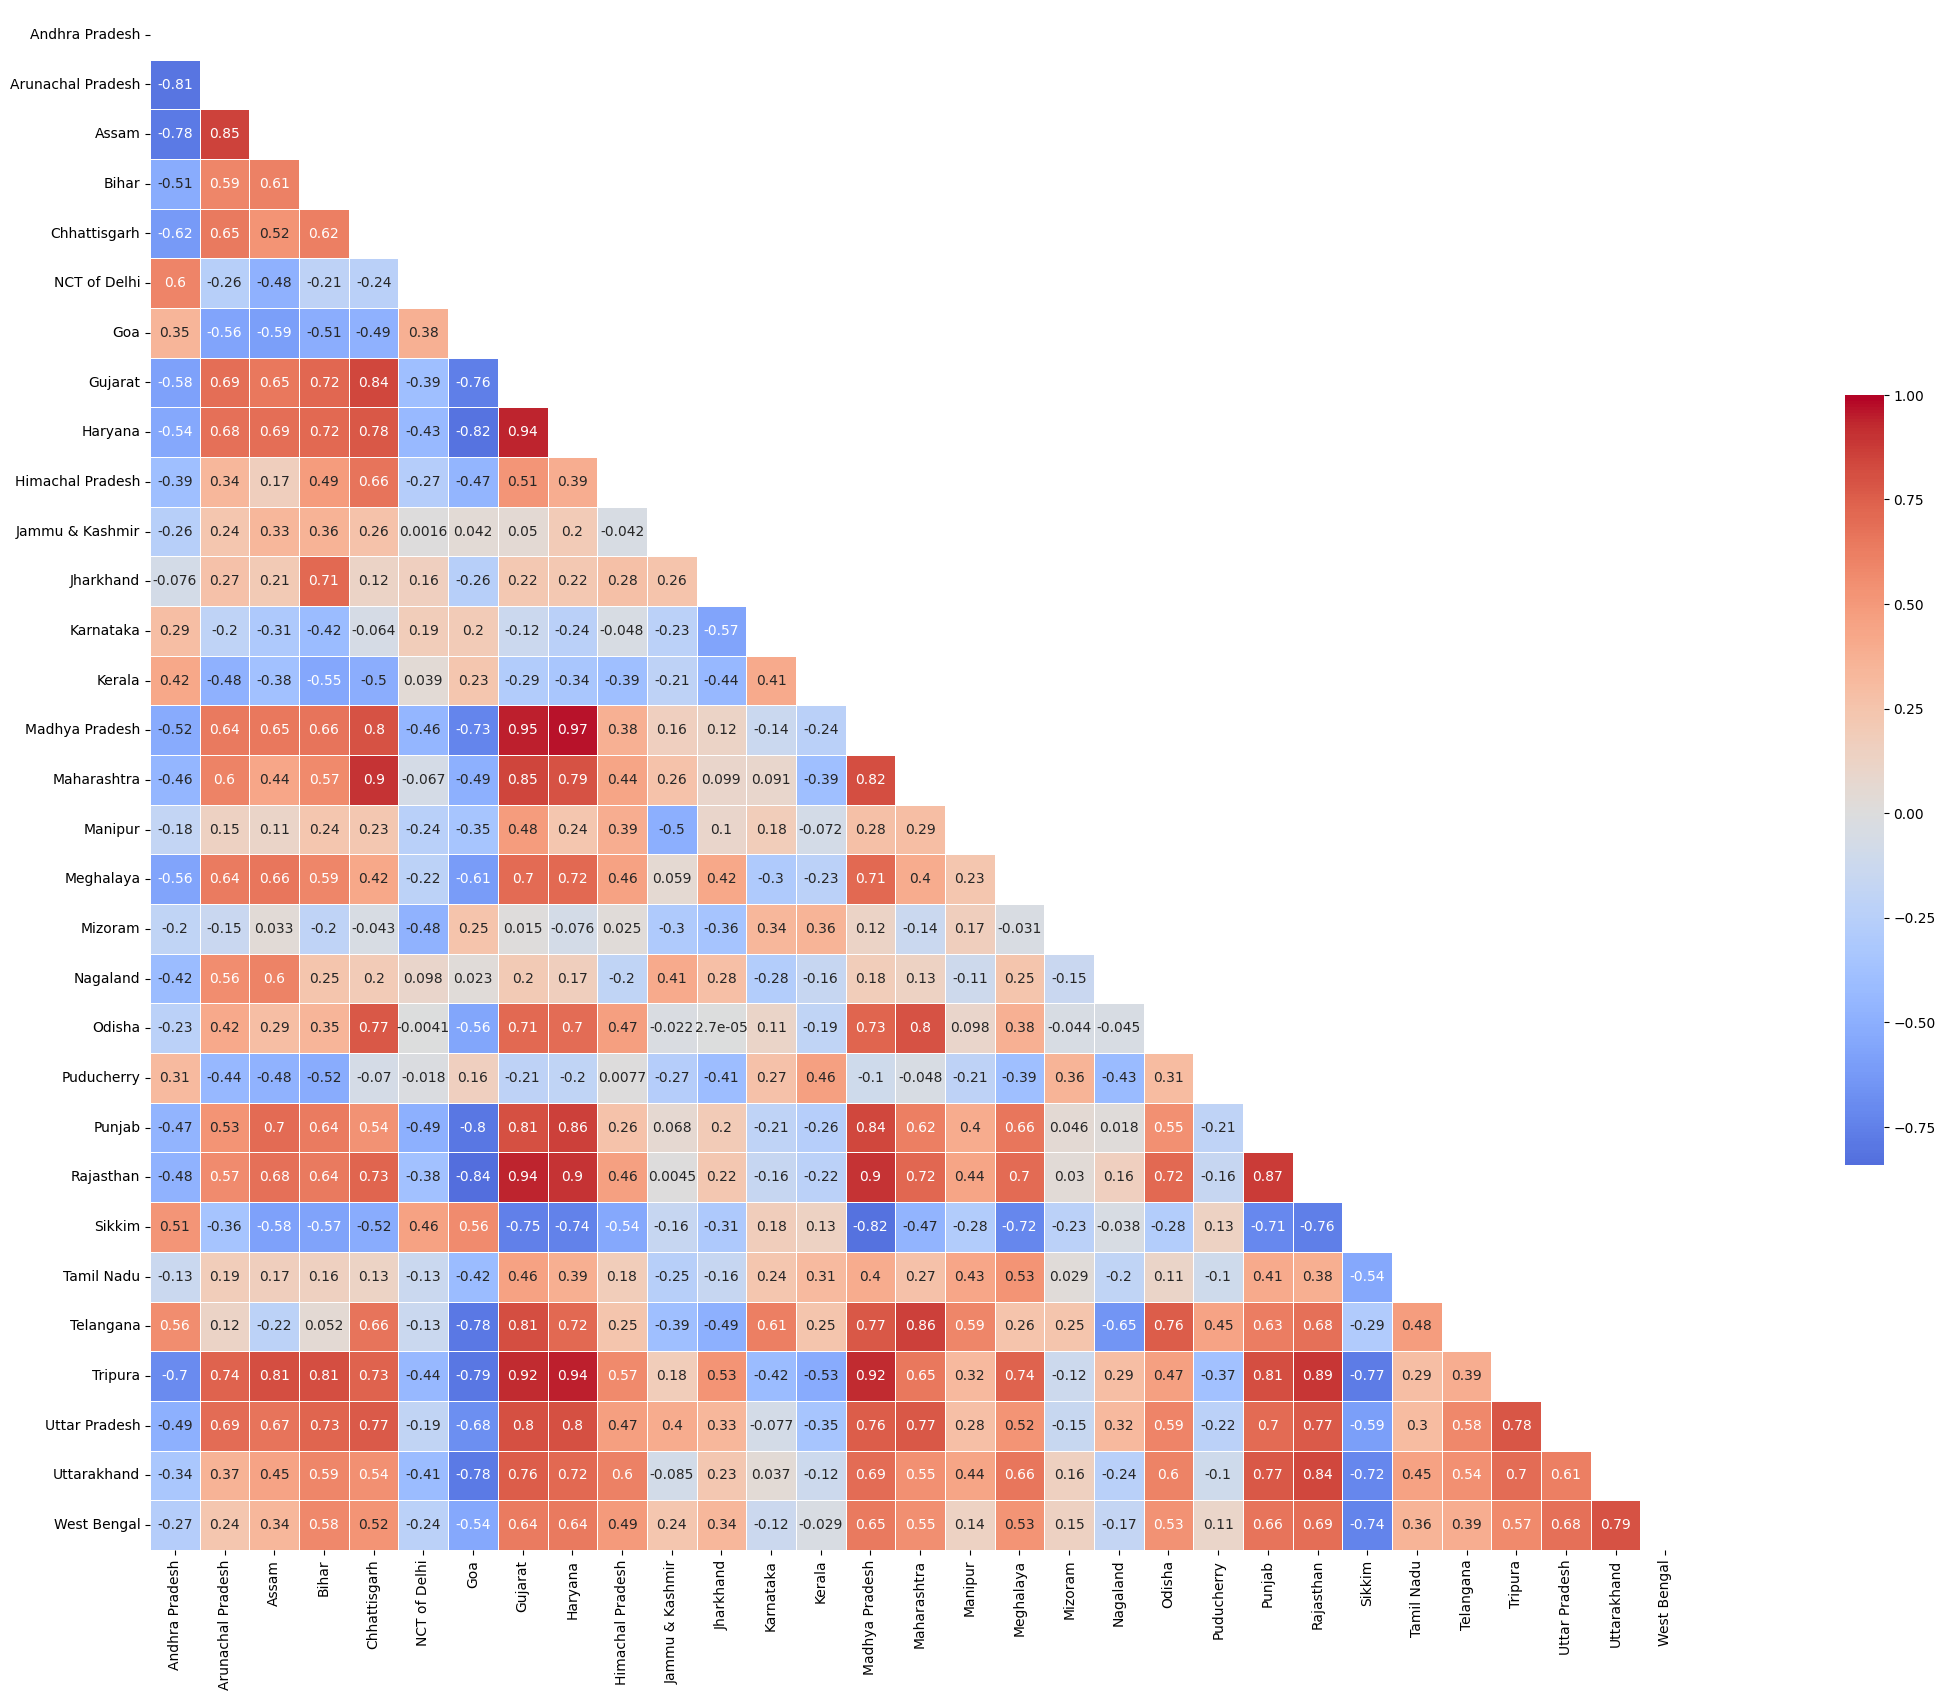

In [25]:
data_CM = data.drop(columns=['Year', 'ALL INDIA'])

correlation_matrix = data_CM.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(40, 20))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


### Observations from the Heatmap:

**Strong Positive Correlations:** There are several pairs of states with strong positive correlations (dark red squares), suggesting that rice production in these states tends to increase and decrease together over the years. This could be due to similar climatic conditions, shared agricultural practices, or interconnected supply chains.

**Weak/Negative Correlations:** Some state pairs show weak to no correlation (lighter shades), and a few show negative correlations (blue squares). Weak correlations indicate that the rice production in these states does not strongly relate to each other, which could be due to differing agricultural zones, policies, or other localized factors.

**Regional Clusters:** There seems to be regional clustering, where neighboring states or states within the same climatic or agricultural zone show higher correlations. For example, states in the northern region such as Haryana, Punjab, and Uttar Pradesh show relatively strong correlations with each other, possibly due to similar agro-climatic conditions.


# Production vs Year For All States

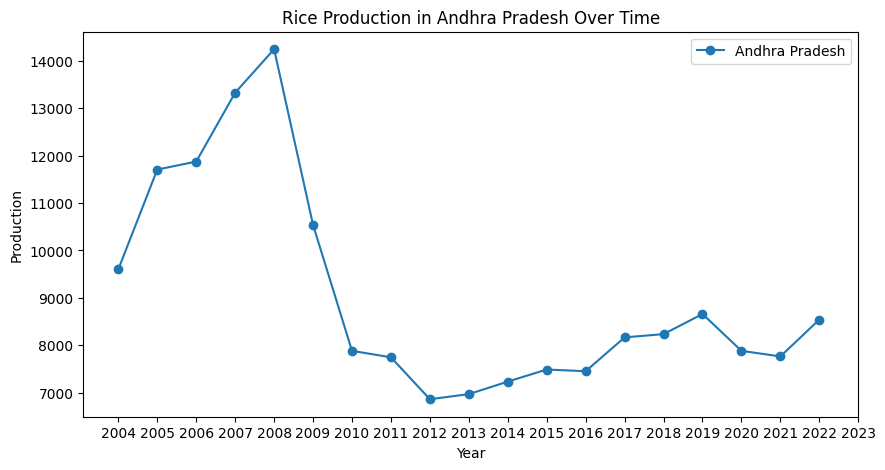

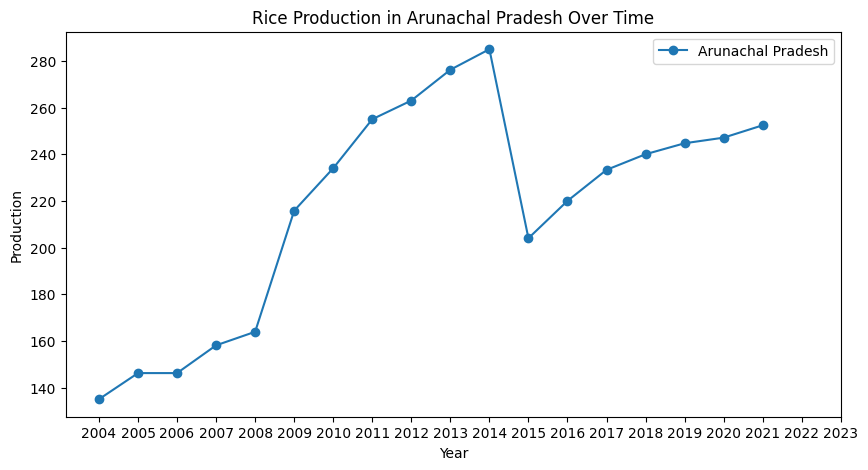

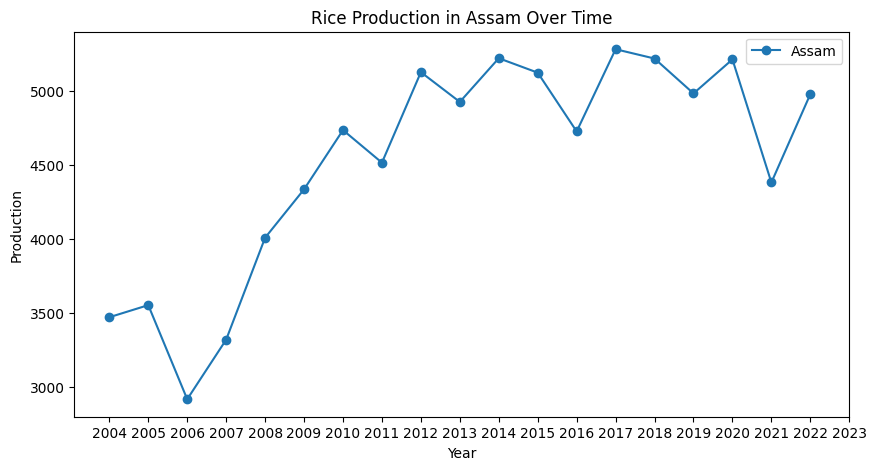

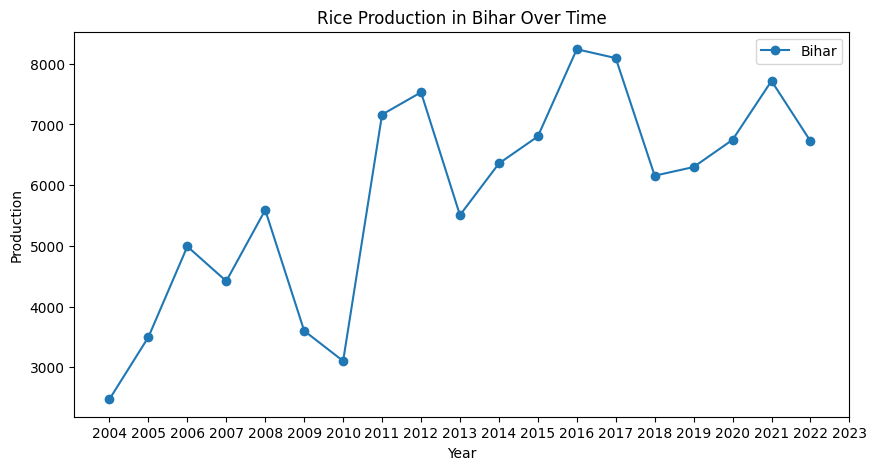

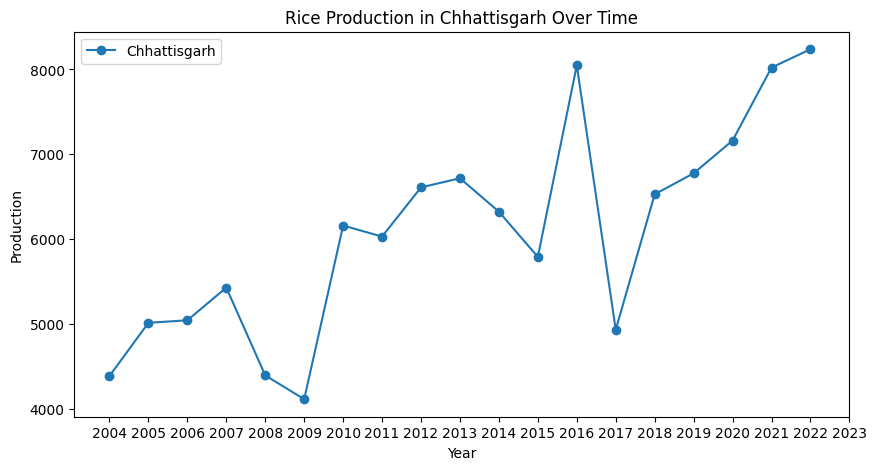

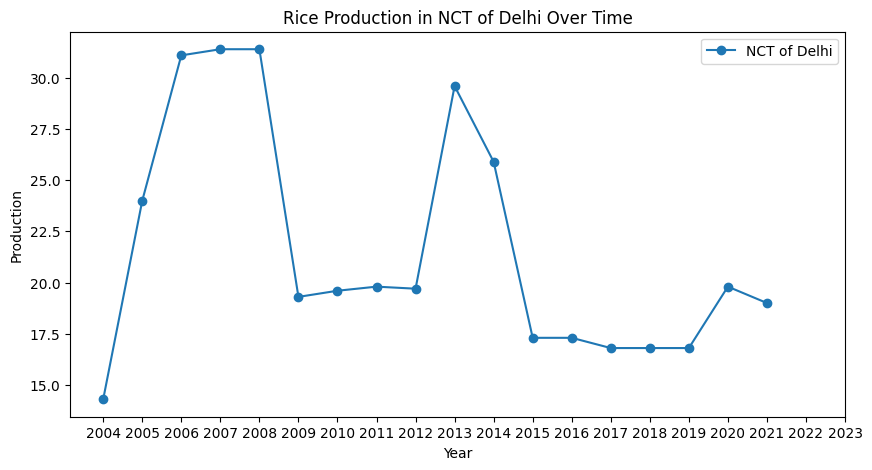

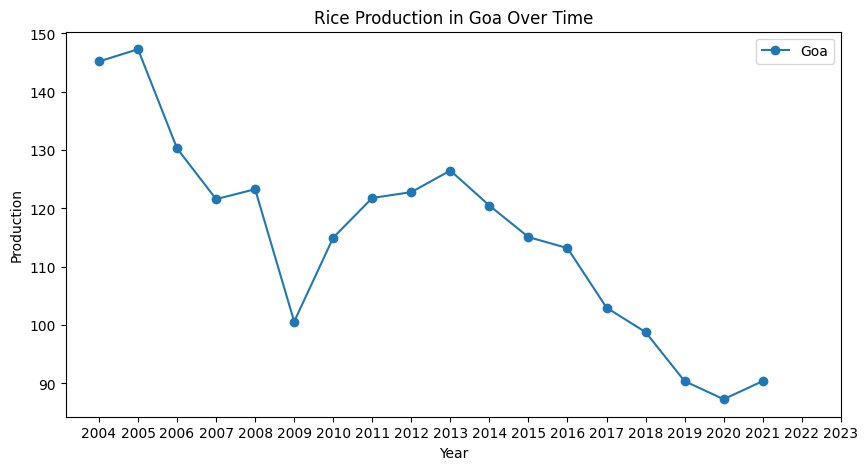

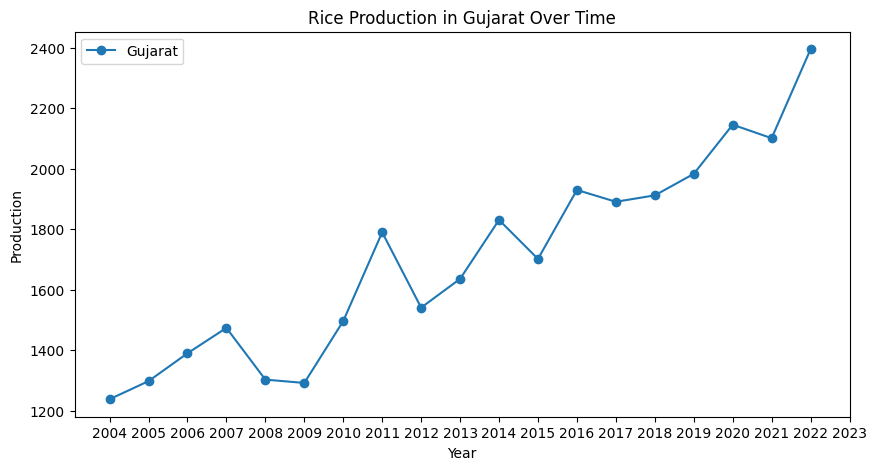

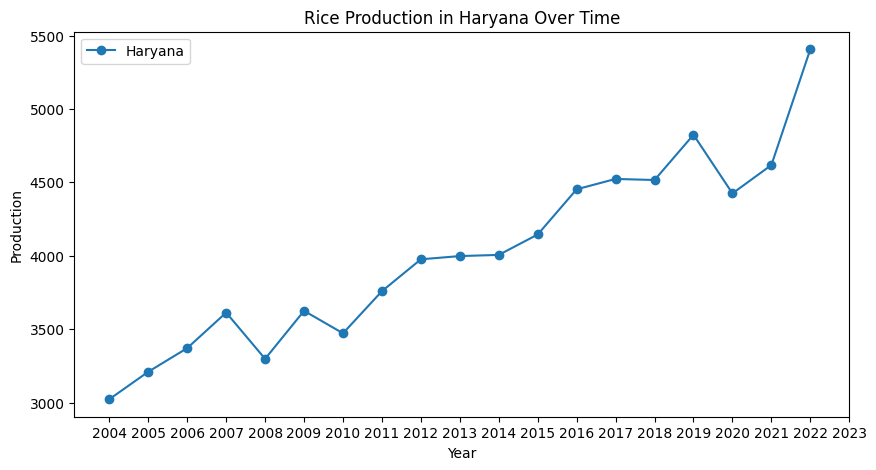

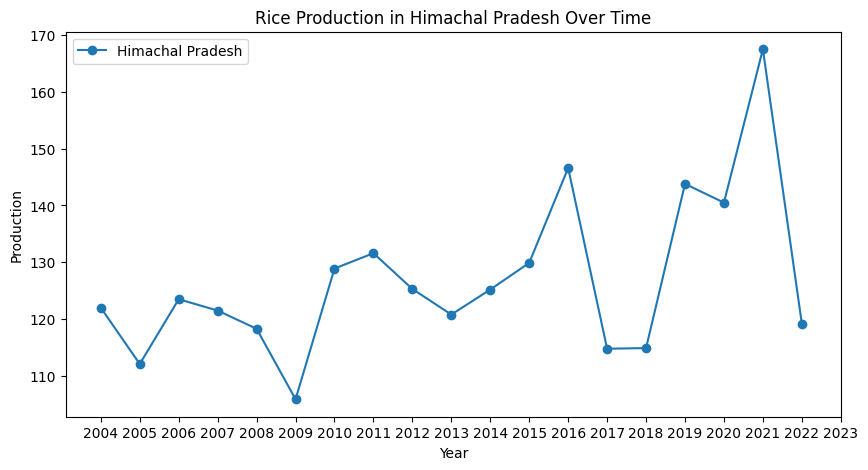

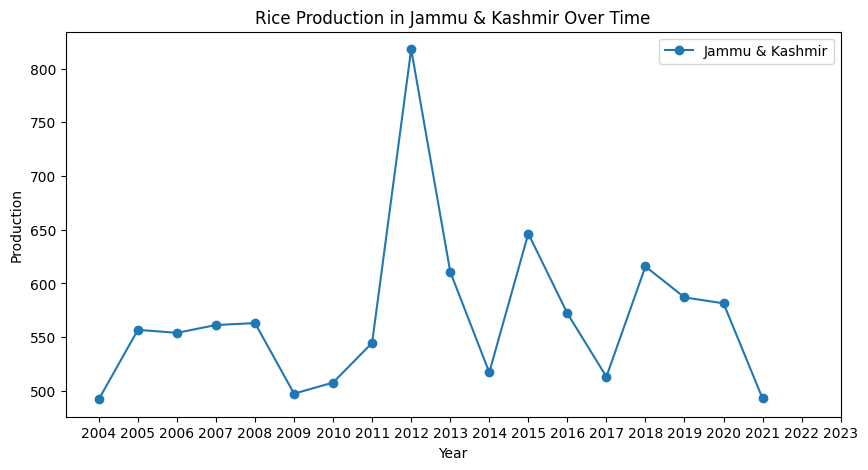

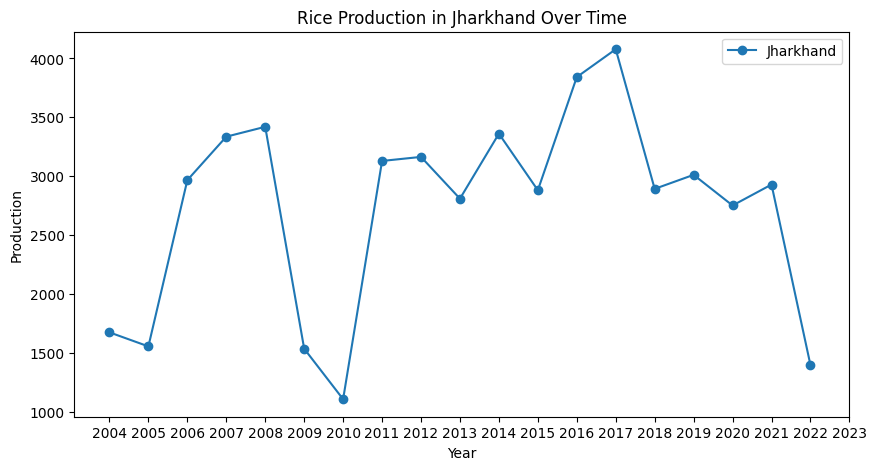

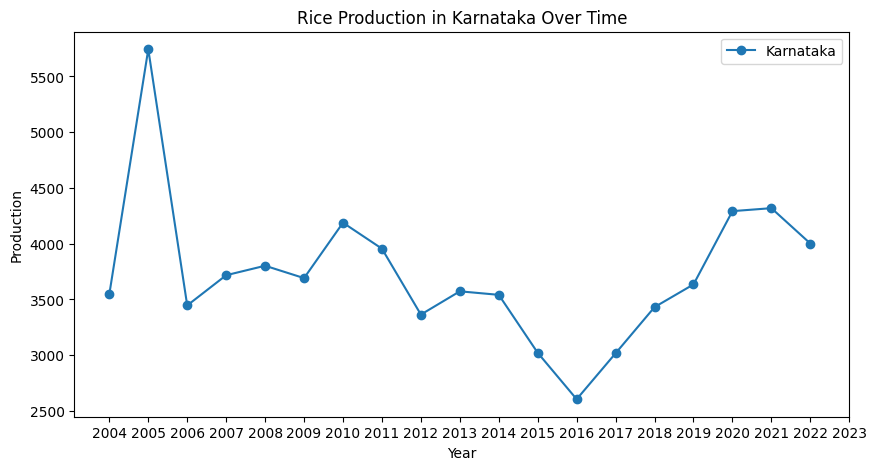

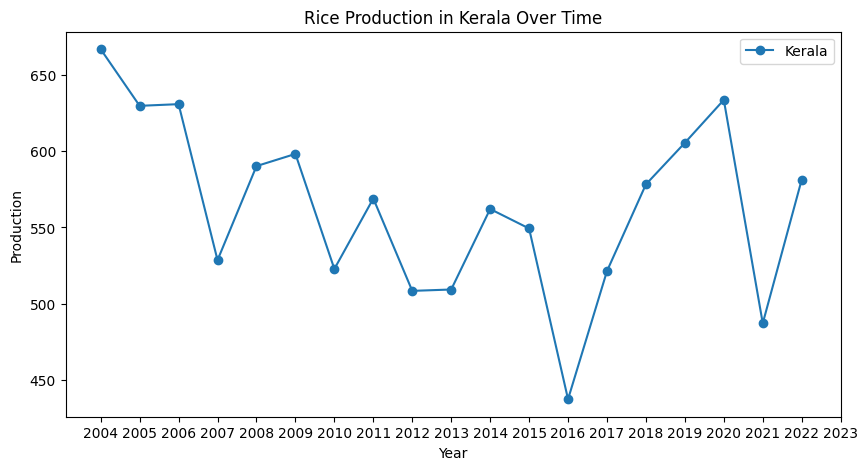

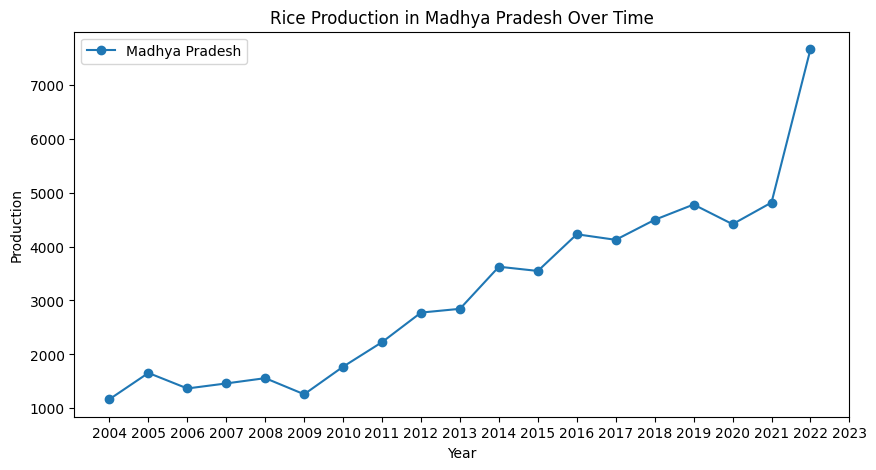

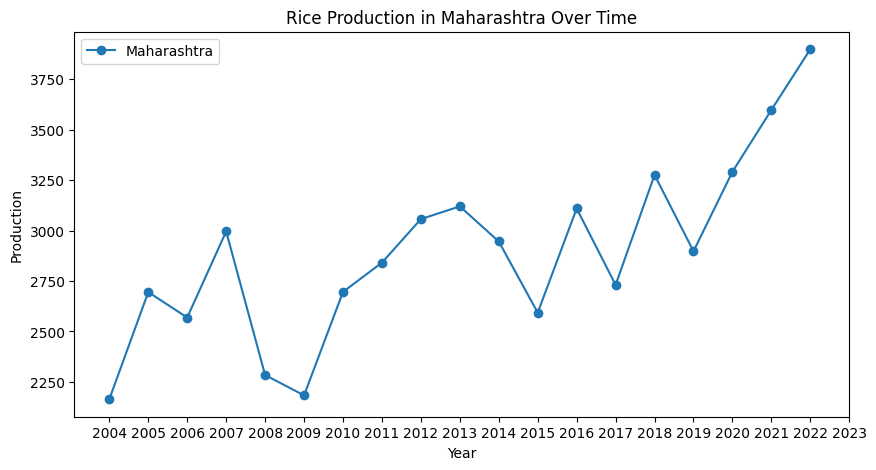

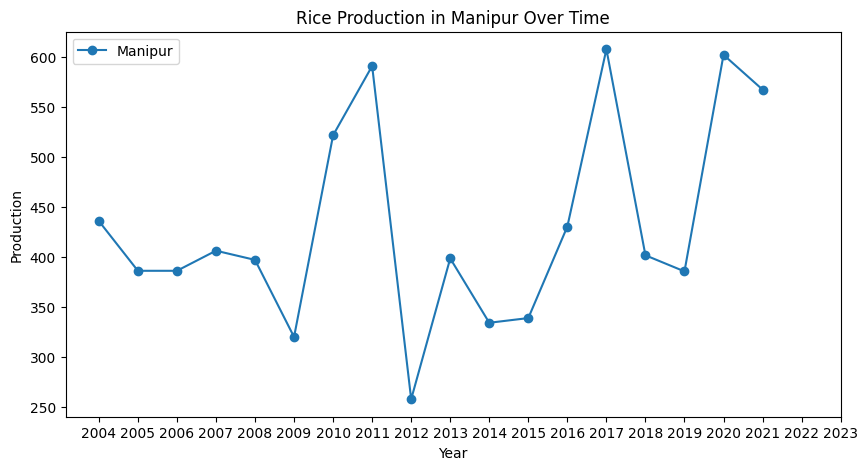

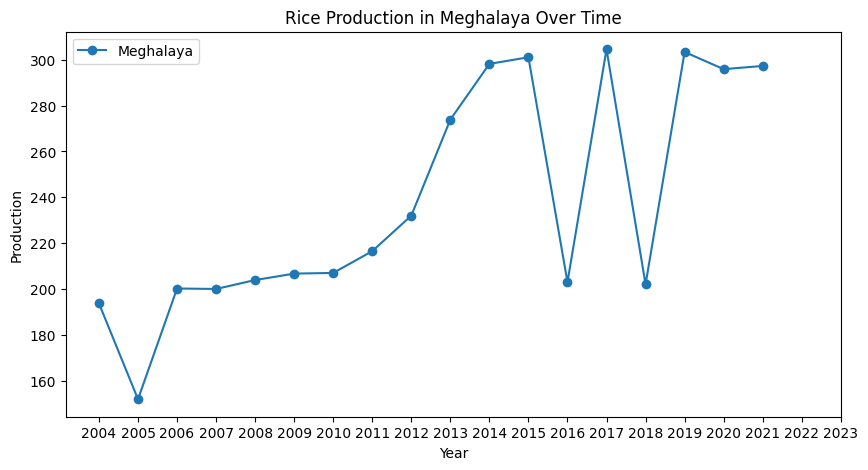

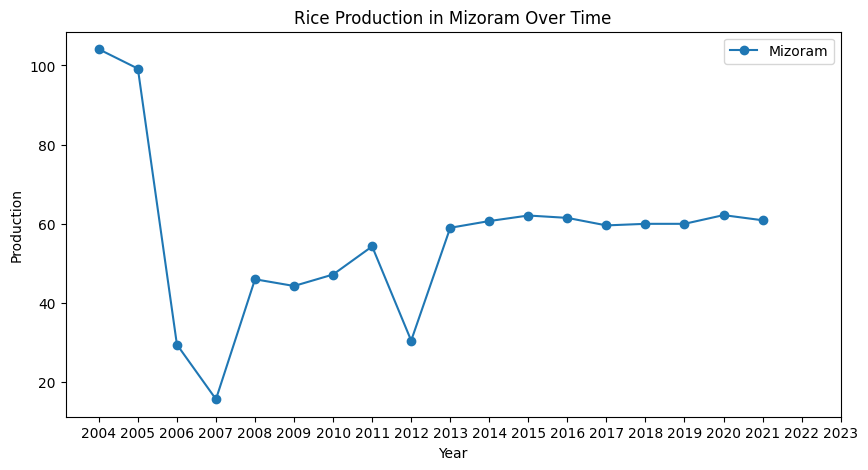

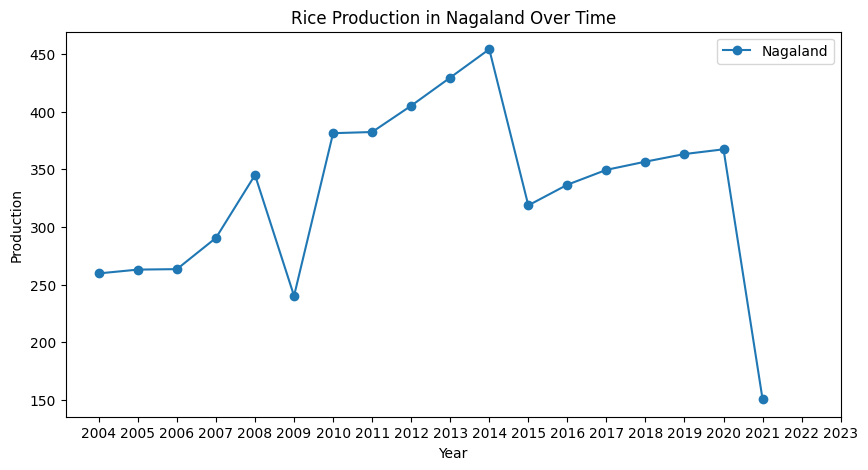

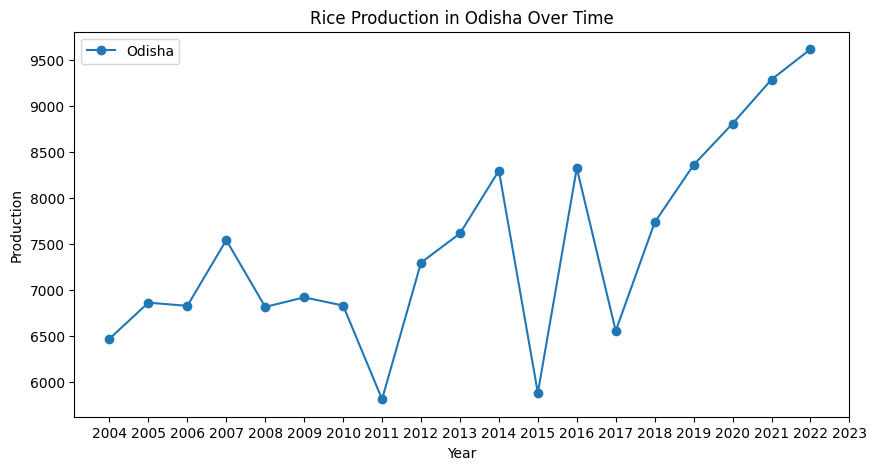

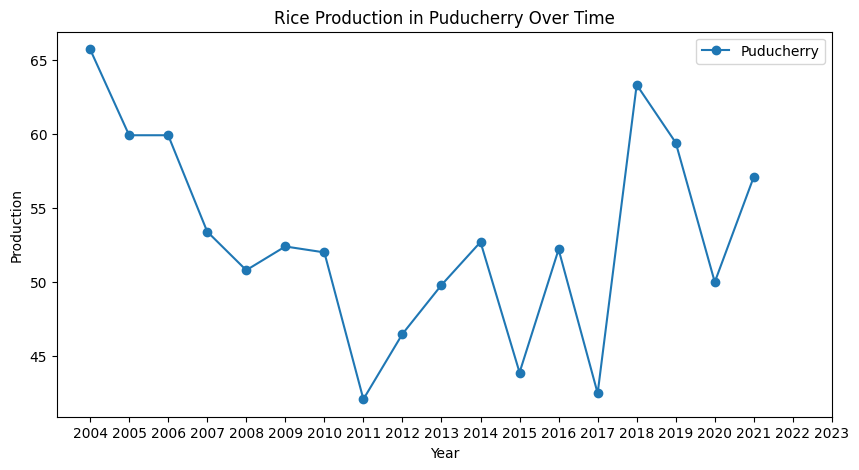

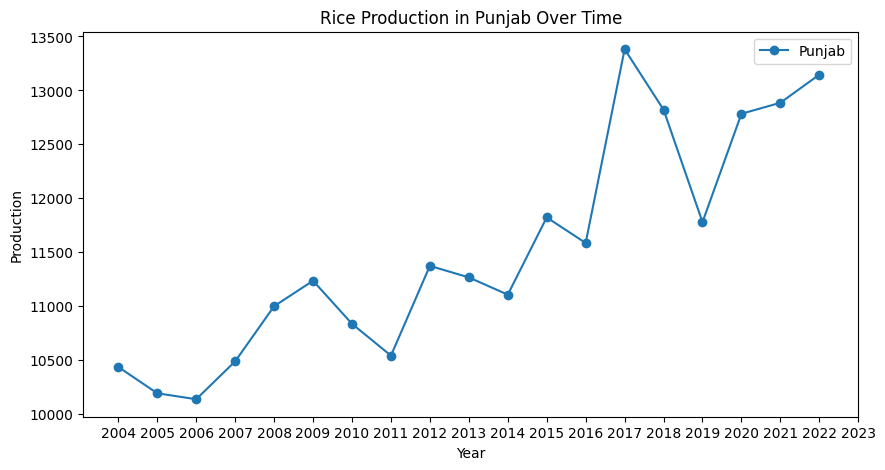

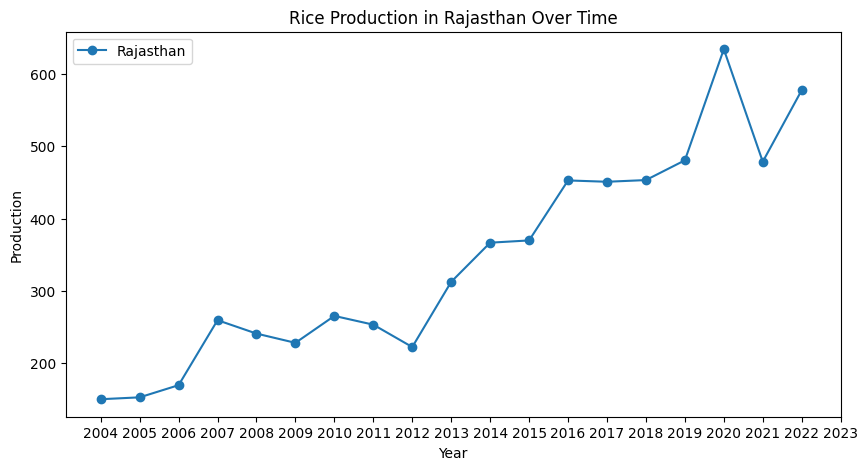

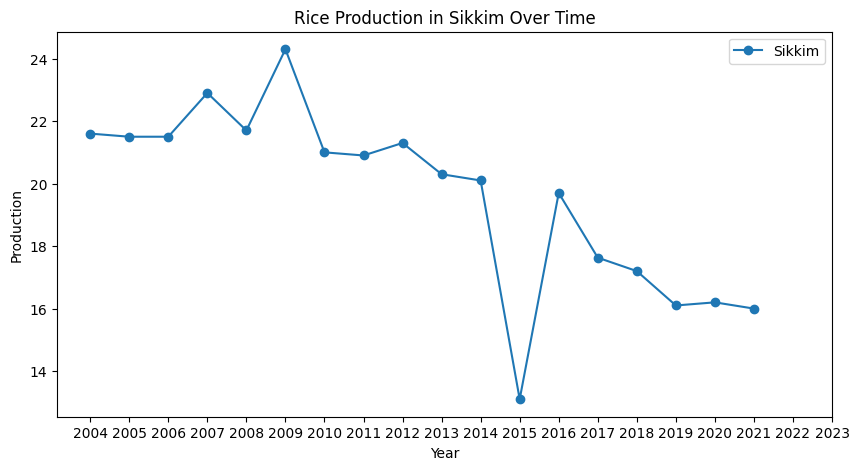

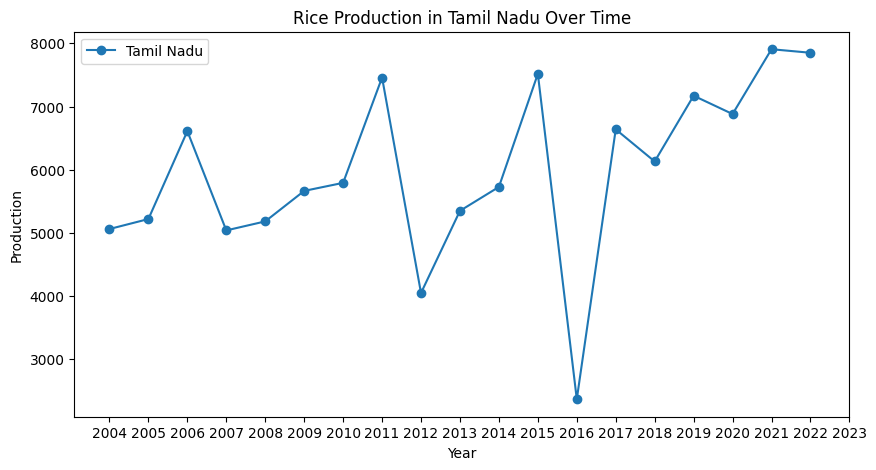

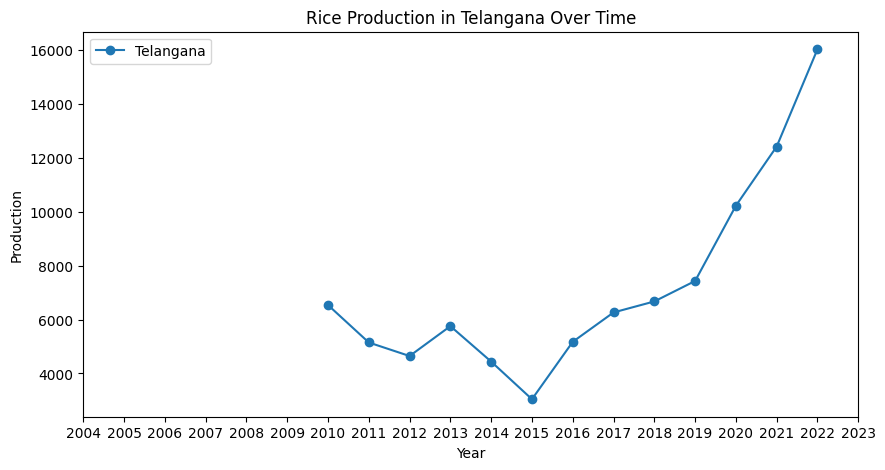

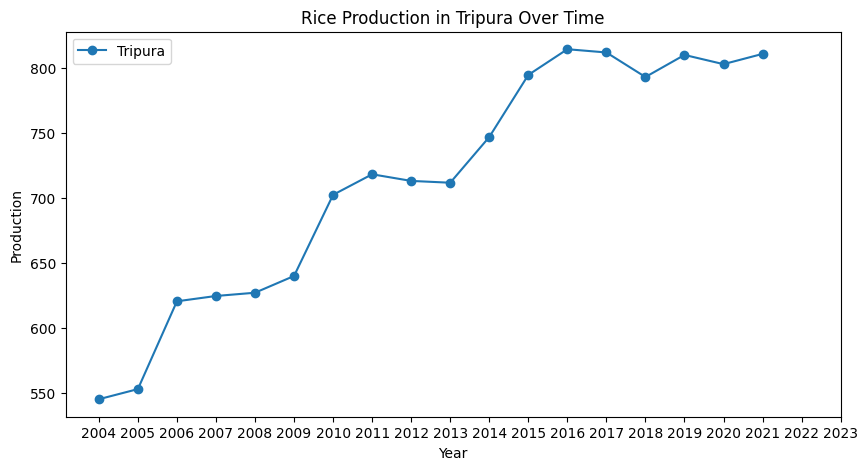

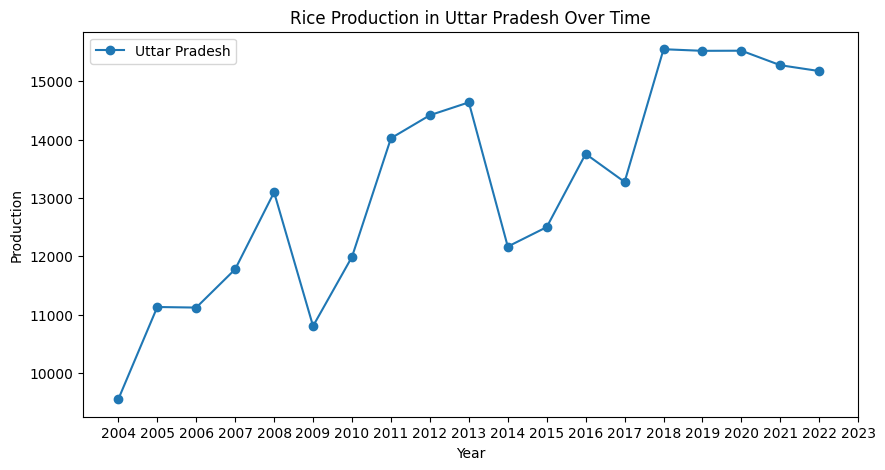

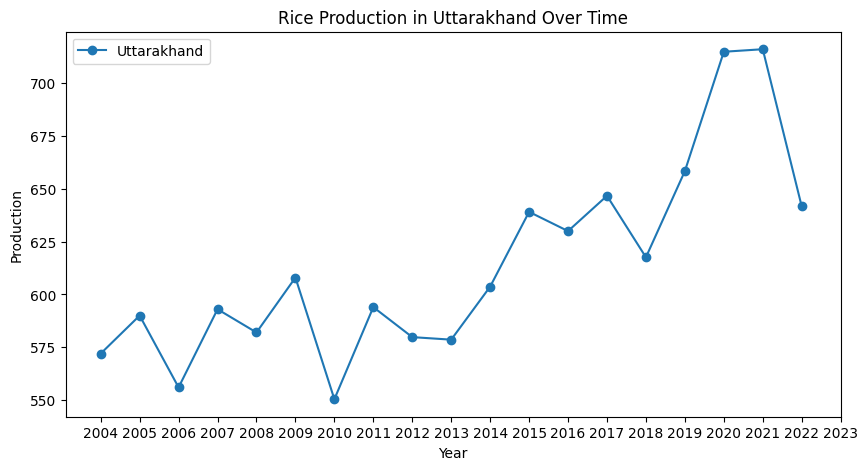

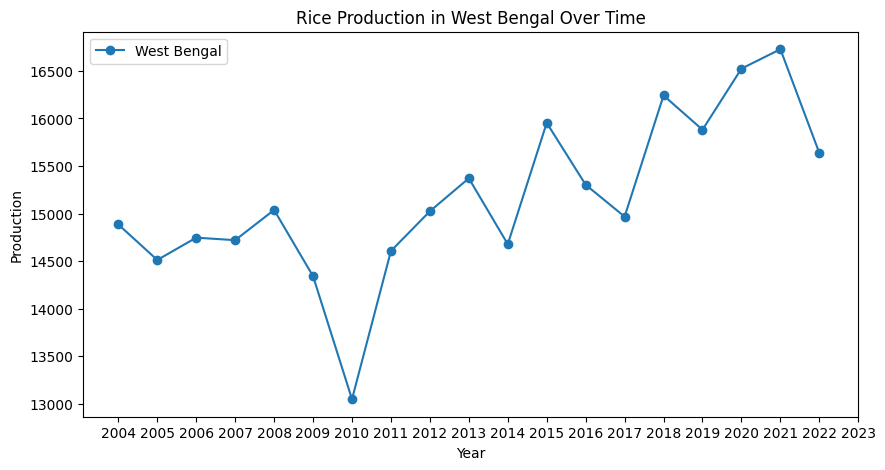

In [26]:
for state in data.columns:
    if state not in ['Year', 'ALL INDIA']:
        plt.figure(figsize=(10, 5))
        plt.plot(data['Year'], data[state], marker='o', linestyle='-', label=state)
        plt.title(f'Rice Production in {state} Over Time')
        plt.xlabel('Year')
        plt.xticks(range(2004, 2024)) 
        plt.ylabel('Production')
        plt.legend()
        plt.show()